<a href="https://colab.research.google.com/github/Thippawan72/BSC_DPDM23/blob/main/Group_project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6807]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score

!pip install apyori
from apyori import apriori

In [6808]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.preprocessing import OneHotEncoder

In [6809]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


In [6810]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6811]:
data_truck = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23_Data/Data_Truck-2.xlsx')

# Data truck 2560

In [6812]:
data_dict_truck = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23_Data/Data_Truck-2.xlsx', sheet_name = 0)
data_dict_truck.head()

,Column,Description,Data Type,ชื่อตัวแปร,ค่าที่เป็นไปได้
0,Date,วันเดือนปีที่เกิดเหตุ,number,NaN,NaN
1,Time,ช่วงเวลาที่เกิดเหตุ,number,16.01 - 20.00 น.,1.0
2,NaN,NaN,NaN,20.01 - 00.00 น.,2.0
3,NaN,NaN,NaN,00.01 - 04.00 น.,3.0
4,NaN,NaN,NaN,04.01 - 08.00 น.,4.0


In [6813]:
data_2560 = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23_Data/Data_Truck-2.xlsx', sheet_name = 1)
data_2560.head()

,Date,Time,Province,Loss,Party,Cause,Main cause of accidents,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,02/01/2560,11:16:00,ขอนแก่น,3,รถอื่นๆ,รถบรรทุก,หลับใน,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,04/01/2560,07:30:00,แพร่,2,ไม่มีคู่กรณี,รถบรรทุก,หลับใน,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,04/01/2560,20:10:00,สระบุรี,2,รถยนต์นั่งส่วนบุคคลเกิน7คน,รถยนต์นั่งส่วนบุคคลเกิน7คน,ขับแซงอย่างผิดกฎหมาย/แซงในที่คับขัน,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,04/01/2560,21:10:00,เพชรบุรี,2,รถจักรยานยนต์,รถจักรยานยนต์,ขับแซงอย่างผิดกฎหมาย/แซงในที่คับขัน,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,05/01/2560,07:30:00,เชียงราย,2,รถยนต์นั่งส่วนบุคคลเกิน7คน,รถยนต์นั่งส่วนบุคคลเกิน7คน,ขับรถเร็ว,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6814]:
data60_col = data_2560[['Date','Time','Province','Loss','Party','Cause','Main cause of accidents']]
data60_col.head()  #เลือกเฉพาะคอลัมน์ที่ต้องการ

,Date,Time,Province,Loss,Party,Cause,Main cause of accidents
0,02/01/2560,11:16:00,ขอนแก่น,3,รถอื่นๆ,รถบรรทุก,หลับใน
1,04/01/2560,07:30:00,แพร่,2,ไม่มีคู่กรณี,รถบรรทุก,หลับใน
2,04/01/2560,20:10:00,สระบุรี,2,รถยนต์นั่งส่วนบุคคลเกิน7คน,รถยนต์นั่งส่วนบุคคลเกิน7คน,ขับแซงอย่างผิดกฎหมาย/แซงในที่คับขัน
3,04/01/2560,21:10:00,เพชรบุรี,2,รถจักรยานยนต์,รถจักรยานยนต์,ขับแซงอย่างผิดกฎหมาย/แซงในที่คับขัน
4,05/01/2560,07:30:00,เชียงราย,2,รถยนต์นั่งส่วนบุคคลเกิน7คน,รถยนต์นั่งส่วนบุคคลเกิน7คน,ขับรถเร็ว


In [6815]:
#เปลี่ยนชื่อจังหวัดเป็นภาษาอังกฤษ
data_truck_60 = data60_col
datamain60 = pd.DataFrame(data_truck_60)
datamain60['Province'] = datamain60['Province'].apply(lambda x: x.strip())
datamain60['Province'] = datamain60['Province'].replace({
    'เชียงใหม่': 'Chiang Mai',
    'เชียงราย': 'Chiang Rai',
    'ลำปาง': 'Lampang',
    'ลำพูน': 'Lamphun',
    'แม่ฮ่องสอน': 'Mae Hong Son',
    'น่าน': 'Nan',
    'พะเยา': 'Phayao',
    'แพร่': 'Phrae',
    'อุตรดิตถ์': 'Uttaradit',
    'กาฬสินธุ์': 'Kalasin',
    'ขอนแก่น': 'Khon Kaen',
    'ชัยภูมิ': 'Chaiyaphum',
    'นครพนม': 'Nakhon Phanom',
    'นครราชสีมา': 'Nakhon Ratchasima',
    'บึงกาฬ': 'Bueng Kan',
    'บุรีรัมย์': 'Buriram',
    'มหาสารคาม': 'Maha Sarakham',
    'มุกดาหาร': 'Mukdahan',
    'ยโสธร': 'Yasothon',
    'ร้อยเอ็ด': 'Roi Et',
    'เลย': 'Loei',
    'สกลนคร': 'Sakon Nakhon',
    'สุรินทร์': 'Surin',
    'ศรีสะเกษ': 'Sisaket',
    'หนองคาย': 'Nong Khai',
    'หนองบัวลำภู': 'Nong Bua Lamphu',
    'อุดรธานี': 'Udon Thani',
    'อุบลราชธานี': 'Ubon Ratchathani',
    'อำนาจเจริญ': 'Amnat Charoen',
    'กทม.': 'Bangkok',
    'กทม': 'Bangkok',
    'กรุงเทพมหานคร': 'Bangkok',
    'กำแพงเพชร': 'Kamphaeng Phet',
    'ชัยนาท': 'Chai Nat',
    'นครนายก': 'Nakhon Nayok',
    'นครปฐม': 'Nakhon Pathom',
    'นครสวรรค์': 'Nakhon Sawan',
    'นนทบุรี': 'Nonthaburi',
    'ปทุมธานี': 'Pathum Thani',
    'พระนครศรีอยุธยา': 'Phra Nakhon Si Ayutthaya',
    'พระนครศรี อยุธยา': 'Phra Nakhon Si Ayutthaya',
    'พิจิตร': 'Phichit',
    'พิษณุโลก': 'Phitsanulok',
    'เพชรบูรณ์': 'Phetchabun',
    'ลพบุรี': 'Lopburi',
    'สมุทรปราการ': 'Samut Prakan',
    'สมุทรสงคราม': 'Samut Songkhram',
    'สมุทรสาคร': 'Samut Sakhon',
    'สิงห์บุรี': 'Sing Buri',
    'สุโขทัย': 'Sukhothai',
    'สุพรรณบุรี': 'Suphan Buri',
    'สระบุรี': 'Saraburi',
    'อ่างทอง': 'Ang Thong',
    'อุทัยธานี': 'Uthai Thani',
    'จันทบุรี': 'Chanthaburi',
    'ฉะเชิงเทรา': 'Chachoengsao',
    'ชลบุรี': 'Chonburi',
    'ตราด': 'Trat',
    'ปราจีนบุรี': 'Prachinburi',
    'ระยอง': 'Rayong',
    'สระแก้ว': 'Sa Kaeo',
    'กาญจนบุรี': 'Kanchanaburi',
    'ตาก': 'Tak',
    'ประจวบคีรีขันธ์': 'Prachuap Khiri Khan',
    'เพชรบุรี': 'Phetchaburi',
    'ราชบุรี': 'Ratchaburi',
    'กระบี่': 'Krabi',
    'ชุมพร': 'Chumphon',
    'ตรัง': 'Trang',
    'นครศรีธรรมราช': 'Nakhon Si Thammarat',
    'นราธิวาส': 'Narathiwat',
    'ปัตตานี': 'Pattani',
    'พังงา': 'Phang Nga',
    'พัทลุง': 'Phatthalung',
    'ภูเก็ต': 'Phuket',
    'ระนอง': 'Ranong',
    'สตูล': 'Satun',
    'สงขลา': 'Songkhla',
    'สุราษฎร์ธานี': 'Surat Thani',
    'ยะลา': 'Yala'})

In [6816]:
data_truck_60.head()

,Date,Time,Province,Loss,Party,Cause,Main cause of accidents
0,02/01/2560,11:16:00,Khon Kaen,3,รถอื่นๆ,รถบรรทุก,หลับใน
1,04/01/2560,07:30:00,Phrae,2,ไม่มีคู่กรณี,รถบรรทุก,หลับใน
2,04/01/2560,20:10:00,Saraburi,2,รถยนต์นั่งส่วนบุคคลเกิน7คน,รถยนต์นั่งส่วนบุคคลเกิน7คน,ขับแซงอย่างผิดกฎหมาย/แซงในที่คับขัน
3,04/01/2560,21:10:00,Phetchaburi,2,รถจักรยานยนต์,รถจักรยานยนต์,ขับแซงอย่างผิดกฎหมาย/แซงในที่คับขัน
4,05/01/2560,07:30:00,Chiang Rai,2,รถยนต์นั่งส่วนบุคคลเกิน7คน,รถยนต์นั่งส่วนบุคคลเกิน7คน,ขับรถเร็ว


In [6817]:
#เปลี่ยนสาเหตุเป็นตัวเลขที่กำหนดไว้
data_truck_600 = data_truck_60
datamain60 = pd.DataFrame(data_truck_600)
datamain60['Main cause of accidents'] = datamain60['Main cause of accidents'].apply(lambda x: x.strip())
datamain60['Main cause of accidents'] = datamain60['Main cause of accidents'].replace({'ขับรถเร็ว':'M1',
'ขับรถตัดหน้าในระยะกระชั้นชิด':'M2',
'ขับตามหลังในระยะกระชั้นชิด':'M3',
'หลับใน':'M4',
' หลับใน':'M4',
'ขับแซงอย่างผิดกฎหมาย/แซงในที่คับขัน':	'M5',
'ไม่ชำนาญเส้นทาง':	'M6',
'ขาดทักษะที่ถูกต้องในการขับรถ':	'M7',
'ขับล้ำเข้าไปในช่องทางจราจรอื่น':	'M8',
'ขับล้ำเข้าไปในช่องทางฝั่งตรงข้าม':	'M9',
'ฝ่าฝืนเครื่องหมาย/สัญญาณจราจร':	'M10',
'เปลี่ยนช่องทางกระทันหัน':	'M11',
'เมาสุรา':	'M12',
'ใช้สารเสพติดออกฤทธิ์ต่อจิตประสาท':	'M13',
'ขาดสมาธิขณะขับรถ':	'M14',
'ขับย้อนศร':	'M15',
'จอดรถไหล่ทาง':	'M16',
'จอดในที่ห้ามจอด/จอดไหล่ทางล้ำ/จอดไม่ให้เครื่องหมายหรือสัญญาณ':	'M17',
'ทำกิจกรรมอื่นในขณะขับรถ (ก้มหยิบของ,โทรศัพท์)':	'M18',
'สภาพยางชำรุด':	'M19',
'ระบบเบรกชำรุด':	'M20',
'ระบบคันส่งคันชักชำรุด':	'M21',
'ระบบล้อและเพลาชำรุด':	'M22',
'ระบบไฟฟ้าชำรุด':	'M23',
'ระบบพวงมาลัยชำรุด':	'M24',
'อุปกรณ์ส่วนควบอื่นๆชำรุด':	'M25',
'สภาพถนนชำรุด':	'M26',
'ฝนตกถนนลื่น':	'M27',
'ถนนไม่มีไฟฟ้าแสงสว่าง':	'M28',
'ถนนมีสิ่งกีดขวางจราจร':	'M29',
'ประมาทร่วม':	'M30',
'รถอีกคันกระเด็นมาถูกโดยบังเอิญ':	'M31',
'ปัญหาสุขภาพผู้ขับรถ':	'M32',
'ไม่ระบุ':	'M33',
'คนเดินตัดหน้ารถ'	:'M34' })

In [6818]:
data_truck_600.head()

,Date,Time,Province,Loss,Party,Cause,Main cause of accidents
0,02/01/2560,11:16:00,Khon Kaen,3,รถอื่นๆ,รถบรรทุก,M4
1,04/01/2560,07:30:00,Phrae,2,ไม่มีคู่กรณี,รถบรรทุก,M4
2,04/01/2560,20:10:00,Saraburi,2,รถยนต์นั่งส่วนบุคคลเกิน7คน,รถยนต์นั่งส่วนบุคคลเกิน7คน,M5
3,04/01/2560,21:10:00,Phetchaburi,2,รถจักรยานยนต์,รถจักรยานยนต์,M5
4,05/01/2560,07:30:00,Chiang Rai,2,รถยนต์นั่งส่วนบุคคลเกิน7คน,รถยนต์นั่งส่วนบุคคลเกิน7คน,M1


In [6819]:
# เปลี่ยนตัวแปรคู่กรณี (Party) เป็นตัวเลขที่กำหนดไว้
data_truck_6000 = data_truck_600
datapar60 = pd.DataFrame(data_truck_6000)
datapar60['Party'] = datapar60['Party'].apply(lambda x: x.strip())
datapar60['Party'] = datapar60['Party'].replace({'รถยนต์บรรทุกส่วนบุคคล (ปิคอัพ)':	'P1',
'รถยนต์นั่งส่วนบุคคลไม่เกิน7คน':	'P2',
'รถยนต์นั่งส่วนบุคคลเกิน7คน':	'P3',
'รถบรรทุก':	'P4',
'รถโดยสาร':	'P5',
'รถจักรยานยนต์':	'P6',
'รถจักรยาน':	'P7',
'รถอื่นๆ':	'P8',
'คู่กรณีมากกว่า 1 คัน':	'P9',
'เสาไฟฟ้า':	'P10',
'ป้าย':'P11',
'ต้นไม้':'P12',
'ไม่มีคู่กรณี': 'P13',
'คนเดินเท้า':	'P14',
'ไม่ระบุ':	'P15' })

In [6820]:
data_truck_6000.head()

,Date,Time,Province,Loss,Party,Cause,Main cause of accidents
0,02/01/2560,11:16:00,Khon Kaen,3,P8,รถบรรทุก,M4
1,04/01/2560,07:30:00,Phrae,2,P13,รถบรรทุก,M4
2,04/01/2560,20:10:00,Saraburi,2,P3,รถยนต์นั่งส่วนบุคคลเกิน7คน,M5
3,04/01/2560,21:10:00,Phetchaburi,2,P6,รถจักรยานยนต์,M5
4,05/01/2560,07:30:00,Chiang Rai,2,P3,รถยนต์นั่งส่วนบุคคลเกิน7คน,M1


In [6821]:
# เปลี่ยนตัวแปรรถต้นเหตุ (Cause) เป็นตัวเลขที่กำหนดไว้
data_truck_60000 = data_truck_6000
datapar60 = pd.DataFrame(data_truck_60000)
datapar60['Cause'] = datapar60['Cause'].apply(lambda x: x.strip())
datapar60['Cause'] = datapar60['Cause'].replace({'รถยนต์บรรทุกส่วนบุคคล (ปิคอัพ)':	'C1',
'รถยนต์นั่งส่วนบุคคลไม่เกิน7คน':	'C2',
'รถยนต์นั่งส่วนบุคคลเกิน7คน':	'C3',
'รถบรรทุก':	'C4',
'รถโดยสาร':	'C5',
'รถจักรยานยนต์':	'C6',
'รถจักรยาน':	'C7',
'รถอื่นๆ':	'C8',
'คู่กรณีมากกว่า 1 คัน':	'C9',
'เสาไฟฟ้า':	'C10',
'ป้าย':'C11',
'ต้นไม้':'C12',
'ไม่มีคู่กรณี': 'C13',
'คนเดินเท้า':	'C14',
'ไม่ระบุ':	'C15'})

In [6822]:
data_truck_60000.head()

,Date,Time,Province,Loss,Party,Cause,Main cause of accidents
0,02/01/2560,11:16:00,Khon Kaen,3,P8,C4,M4
1,04/01/2560,07:30:00,Phrae,2,P13,C4,M4
2,04/01/2560,20:10:00,Saraburi,2,P3,C3,M5
3,04/01/2560,21:10:00,Phetchaburi,2,P6,C6,M5
4,05/01/2560,07:30:00,Chiang Rai,2,P3,C3,M1


# Data truck 2561

In [6823]:
data_2561 = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23_Data/Data_Truck-2.xlsx', sheet_name = 2)
data_2561.head()

,Date,Time,Province,Loss,Party,Cause,Main cause of accidents
0,01/01/2561,2.0,สมุทรสาคร,1,6,1,16
1,01/01/2561,2.0,ระยอง,1,6,1,16
2,02/01/2561,5.0,สมุทรสาคร,3,1,1,19
3,03/01/2561,6.0,สุราษฎร์ธานี,2,9,1,6
4,03/01/2561,1.0,ระยอง,1,6,6,1


In [6824]:
#เปลี่ยนชื่อจังหวัดเป็นภาษาอังกฤษ
data_truck_61 = data_2561
datamain61 = pd.DataFrame(data_truck_61)
datamain61['Province'] = datamain61['Province'].apply(lambda x: x.strip())
datamain61['Province'] = datamain61['Province'].replace({
    'เชียงใหม่': 'Chiang Mai',
    'เชียงราย': 'Chiang Rai',
    'ลำปาง': 'Lampang',
    'ลำพูน': 'Lamphun',
    'แม่ฮ่องสอน': 'Mae Hong Son',
    'น่าน': 'Nan',
    'พะเยา': 'Phayao',
    'แพร่': 'Phrae',
    'อุตรดิตถ์': 'Uttaradit',
    'กาฬสินธุ์': 'Kalasin',
    'ขอนแก่น': 'Khon Kaen',
    'ชัยภูมิ': 'Chaiyaphum',
    'นครพนม': 'Nakhon Phanom',
    'นครราชสีมา': 'Nakhon Ratchasima',
    'บึงกาฬ': 'Bueng Kan',
    'บุรีรัมย์': 'Buriram',
    'มหาสารคาม': 'Maha Sarakham',
    'มุกดาหาร': 'Mukdahan',
    'ยโสธร': 'Yasothon',
    'ร้อยเอ็ด': 'Roi Et',
    'เลย': 'Loei',
    'สกลนคร': 'Sakon Nakhon',
    'สุรินทร์': 'Surin',
    'ศรีสะเกษ': 'Sisaket',
    'หนองคาย': 'Nong Khai',
    'หนองบัวลำภู': 'Nong Bua Lamphu',
    'อุดรธานี': 'Udon Thani',
    'อุบลราชธานี': 'Ubon Ratchathani',
    'อำนาจเจริญ': 'Amnat Charoen',
    'กรุงเทพมหานคร': 'Bangkok',
    'กำแพงเพชร': 'Kamphaeng Phet',
    'ชัยนาท': 'Chai Nat',
    'นครนายก': 'Nakhon Nayok',
    'นครปฐม': 'Nakhon Pathom',
    'นครสวรรค์': 'Nakhon Sawan',
    'นนทบุรี': 'Nonthaburi',
    'ปทุมธานี': 'Pathum Thani',
    'พระนครศรีอยุธยา': 'Phra Nakhon Si Ayutthaya',
    'พระนครศรี อยุธยา': 'Phra Nakhon Si Ayutthaya',
    'พิจิตร': 'Phichit',
    'พิษณุโลก': 'Phitsanulok',
    'เพชรบูรณ์': 'Phetchabun',
    'ลพบุรี': 'Lopburi',
    'สมุทรปราการ': 'Samut Prakan',
    'สมุทรสงคราม': 'Samut Songkhram',
    'สมุทรสาคร': 'Samut Sakhon',
    'สิงห์บุรี': 'Sing Buri',
    'สุโขทัย': 'Sukhothai',
    'สุพรรณบุรี': 'Suphan Buri',
    'สระบุรี': 'Saraburi',
    'อ่างทอง': 'Ang Thong',
    'อุทัยธานี': 'Uthai Thani',
    'จันทบุรี': 'Chanthaburi',
    'ฉะเชิงเทรา': 'Chachoengsao',
    'ชลบุรี': 'Chonburi',
    'ตราด': 'Trat',
    'ปราจีนบุรี': 'Prachinburi',
    'ระยอง': 'Rayong',
    'สระแก้ว': 'Sa Kaeo',
    'กาญจนบุรี': 'Kanchanaburi',
    'ตาก': 'Tak',
    'ประจวบคีรีขันธ์': 'Prachuap Khiri Khan',
    'เพชรบุรี': 'Phetchaburi',
    'ราชบุรี': 'Ratchaburi',
    'กระบี่': 'Krabi',
    'ชุมพร': 'Chumphon',
    'ตรัง': 'Trang',
    'นครศรีธรรมราช': 'Nakhon Si Thammarat',
    'นราธิวาส': 'Narathiwat',
    'ปัตตานี': 'Pattani',
    'พังงา': 'Phang Nga',
    'พัทลุง': 'Phatthalung',
    'ภูเก็ต': 'Phuket',
    'ระนอง': 'Ranong',
    'สตูล': 'Satun',
    'สงขลา': 'Songkhla',
    'สุราษฎร์ธานี': 'Surat Thani',
    'ยะลา': 'Yala'})


In [6825]:
data_truck_61

,Date,Time,Province,Loss,Party,Cause,Main cause of accidents
0,01/01/2561,2.0,Samut Sakhon,1,6,1,16
1,01/01/2561,2.0,Rayong,1,6,1,16
2,02/01/2561,5.0,Samut Sakhon,3,1,1,19
3,03/01/2561,6.0,Surat Thani,2,9,1,6
4,03/01/2561,1.0,Rayong,1,6,6,1
...,...,...,...,...,...,...,...
853,29/12/2561,5.0,Phra Nakhon Si Ayutthaya,4,13,1,4
854,29/12/2561,5.0,Chanthaburi,2,9,1,3
855,29/12/2561,5.0,Lamphun,2,2,1,27
856,29/12/2561,6.0,Chachoengsao,3,1,1,4


In [6826]:
data_truck_61['Party'] = data_truck_61['Party'].astype(str)

In [6827]:
data_truck_611 = data_truck_61
datapar61 = pd.DataFrame(data_truck_611)
datapar61['Party'] = datapar61['Party'].apply(lambda x: x.strip())
datapar61['Party'] = datapar61['Party'].replace({'1':	'P1',
'2':	'P2',
'3':	'P3',
'4':	'P4',
'5':	'P5',
'6':	'P6',
'7':	'P7',
'8':	'P8',
'9':	'P9',
'10':	'P10',
'11':'P11',
'12':'P12',
'13': 'P13',
'14':	'P14',
'15':	'P15' })

In [6828]:
data_truck_611.head()

,Date,Time,Province,Loss,Party,Cause,Main cause of accidents
0,01/01/2561,2.0,Samut Sakhon,1,P6,1,16
1,01/01/2561,2.0,Rayong,1,P6,1,16
2,02/01/2561,5.0,Samut Sakhon,3,P1,1,19
3,03/01/2561,6.0,Surat Thani,2,P9,1,6
4,03/01/2561,1.0,Rayong,1,P6,6,1


In [6829]:
data_truck_611['Cause'] = data_truck_611['Cause'].astype(str)

In [6830]:
data_truck_611 = data_truck_61
datacause61 = pd.DataFrame(data_truck_611)
datacause61['Cause'] = datacause61['Cause'].apply(lambda x: x.strip())
datacause61['Cause'] = datacause61['Cause'].replace({'1':	'C1',
'2':	'C2',
'3':	'C3',
'4':	'C4',
'5':	'C5',
'6':	'C6',
'7':	'C7',
'8':	'C8',
'9':	'C9',
'10':	'C10',
'11':'C11',
'12':'C12',
'13': 'C13',
'14':	'C14',
'15':	'C15'})


In [6831]:
data_truck_611

,Date,Time,Province,Loss,Party,Cause,Main cause of accidents
0,01/01/2561,2.0,Samut Sakhon,1,P6,C1,16
1,01/01/2561,2.0,Rayong,1,P6,C1,16
2,02/01/2561,5.0,Samut Sakhon,3,P1,C1,19
3,03/01/2561,6.0,Surat Thani,2,P9,C1,6
4,03/01/2561,1.0,Rayong,1,P6,C6,1
...,...,...,...,...,...,...,...
853,29/12/2561,5.0,Phra Nakhon Si Ayutthaya,4,P13,C1,4
854,29/12/2561,5.0,Chanthaburi,2,P9,C1,3
855,29/12/2561,5.0,Lamphun,2,P2,C1,27
856,29/12/2561,6.0,Chachoengsao,3,P1,C1,4


In [6832]:
data_truck_611['Main cause of accidents'] = data_truck_611['Main cause of accidents'].astype(str)

In [6833]:
data_truck_611 = data_truck_61
datamain61 = pd.DataFrame(data_truck_611)
datamain61['Main cause of accidents'] = datamain61['Main cause of accidents'].apply(lambda x: x.strip())
datamain61['Main cause of accidents'] = datamain61['Main cause of accidents'].replace({'1':'M1',
'2':'M2',
'3':'M3',
'4':'M4',
'5':	'M5',
'6':	'M6',
'7':	'M7',
'8':	'M8',
'9':	'M9',
'10':	'M10',
'11':	'M11',
'12':	'M12',
'13':	'M13',
'14':	'M14',
'15':	'M15',
'16':	'M16',
'17':	'M17',
'18':	'M18',
'19':	'M19',
'20':	'M20',
'21':	'M21',
'22':	'M22',
'23':	'M23',
'24':	'M24',
'25':	'M25',
'26':	'M26',
'27':	'M27',
'28':	'M28',
'29':	'M29',
'30':	'M30',
'31':	'M31',
'32':	'M32',
'33':	'M33',
'34'	:'M34' })


In [6834]:
data_truck_611.head()

,Date,Time,Province,Loss,Party,Cause,Main cause of accidents
0,01/01/2561,2.0,Samut Sakhon,1,P6,C1,M16
1,01/01/2561,2.0,Rayong,1,P6,C1,M16
2,02/01/2561,5.0,Samut Sakhon,3,P1,C1,M19
3,03/01/2561,6.0,Surat Thani,2,P9,C1,M6
4,03/01/2561,1.0,Rayong,1,P6,C6,M1


# Data truck 2562

In [6835]:
data_2562 = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23_Data/Data_Truck-2.xlsx', sheet_name = 3)
data_2562.head()

,Date,Time,Province,Loss,Party,Cause,Main cause of accidents
0,01/01/2562,12:45:00,สิงห์บุรี,1,รถจักรยานยนต์,รถบรรทุก,จอดรถไหล่ทาง
1,01/01/2562,05:00:00,สุพรรณบุรี,2,รถโดยสาร,รถบรรทุก,ขับย้อนศร
2,01/01/2562,12:50:00,พระนครศรีอยุธยา,4,คู่กรณีมากกว่า 1 คัน,รถบรรทุก,ขับตามหลังในระยะกระชั้นชิด
3,02/01/2562,13:30:00,เลย,3,รถยนต์นั่งส่วนบุคคลไม่เกิน7คน,รถบรรทุก,ขับรถตัดหน้าในระยะกระชั้นชิด
4,02/01/2562,17:00:00,ระนอง,1,รถจักรยานยนต์,รถจักรยานยนต์,ขับล้ำเข้าไปในช่องทางจราจรอื่น


In [6836]:
#เปลี่ยนชื่อจังหวัดเป็นภาษาอังกฤษ
data_truck_62 = data_2562
data_2562 = pd.DataFrame(data_truck_62)
data_2562['Province'] = data_2562['Province'].apply(lambda x: x.strip())
data_2562['Province'] = data_2562['Province'].replace({
    'เชียงใหม่': 'Chiang Mai',
    'เชียงราย': 'Chiang Rai',
    'ลำปาง': 'Lampang',
    'ลำพูน': 'Lamphun',
    'แม่ฮ่องสอน': 'Mae Hong Son',
    'น่าน': 'Nan',
    'พะเยา': 'Phayao',
    'แพร่': 'Phrae',
    'อุตรดิตถ์': 'Uttaradit',
    'กาฬสินธุ์': 'Kalasin',
    'ขอนแก่น': 'Khon Kaen',
    'ชัยภูมิ': 'Chaiyaphum',
    'นครพนม': 'Nakhon Phanom',
    'นครราชสีมา': 'Nakhon Ratchasima',
    'บึงกาฬ': 'Bueng Kan',
    'บุรีรัมย์': 'Buriram',
    'มหาสารคาม': 'Maha Sarakham',
    'มุกดาหาร': 'Mukdahan',
    'ยโสธร': 'Yasothon',
    'ร้อยเอ็ด': 'Roi Et',
    'เลย': 'Loei',
    'สกลนคร': 'Sakon Nakhon',
    'สุรินทร์': 'Surin',
    'ศรีสะเกษ': 'Sisaket',
    'หนองคาย': 'Nong Khai',
    'หนองบัวลำภู': 'Nong Bua Lamphu',
    'อุดรธานี': 'Udon Thani',
    'อุบลราชธานี': 'Ubon Ratchathani',
    'อำนาจเจริญ': 'Amnat Charoen',
    'กทม.': 'Bangkok',
    'กรุงเทพฯ': 'Bangkok',
    'กรุงเทพมหานคร': 'Bangkok',
    'กำแพงเพชร': 'Kamphaeng Phet',
    'ชัยนาท': 'Chai Nat',
    'นครนายก': 'Nakhon Nayok',
    'นครปฐม': 'Nakhon Pathom',
    'นครสวรรค์': 'Nakhon Sawan',
    'นนทบุรี': 'Nonthaburi',
    'ปทุมธานี': 'Pathum Thani',
    'พระนครศรีอยุธยา': 'Phra Nakhon Si Ayutthaya',
    'พระนครศรี อยุธยา': 'Phra Nakhon Si Ayutthaya',
    'พิจิตร': 'Phichit',
    'พิษณุโลก': 'Phitsanulok',
    'เพชรบูรณ์': 'Phetchabun',
    'ลพบุรี': 'Lopburi',
    'สมุทรปราการ': 'Samut Prakan',
    'สมุทรสงคราม': 'Samut Songkhram',
    'สมุทรสาคร': 'Samut Sakhon',
    'สิงห์บุรี': 'Sing Buri',
    'สุโขทัย': 'Sukhothai',
    'สุพรรณบุรี': 'Suphan Buri',
    'สระบุรี': 'Saraburi',
    'อ่างทอง': 'Ang Thong',
    'อุทัยธานี': 'Uthai Thani',
    'จันทบุรี': 'Chanthaburi',
    'ฉะเชิงเทรา': 'Chachoengsao',
    'ชลบุรี': 'Chonburi',
    'ตราด': 'Trat',
    'ปราจีนบุรี': 'Prachinburi',
    'ระยอง': 'Rayong',
    'สระแก้ว': 'Sa Kaeo',
    'กาญจนบุรี': 'Kanchanaburi',
    'ตาก': 'Tak',
    'ประจวบคีรีขันธ์': 'Prachuap Khiri Khan',
    'เพชรบุรี': 'Phetchaburi',
    'ราชบุรี': 'Ratchaburi',
    'กระบี่': 'Krabi',
    'ชุมพร': 'Chumphon',
    'ตรัง': 'Trang',
    'นครศรีธรรมราช': 'Nakhon Si Thammarat',
    'นราธิวาส': 'Narathiwat',
    'ปัตตานี': 'Pattani',
    'พังงา': 'Phang Nga',
    'พัทลุง': 'Phatthalung',
    'ภูเก็ต': 'Phuket',
    'ระนอง': 'Ranong',
    'สตูล': 'Satun',
    'สงขลา': 'Songkhla',
    'สุราษฎร์ธานี': 'Surat Thani',
    'ยะลา': 'Yala'})


In [6837]:
data_truck_62.head()

,Date,Time,Province,Loss,Party,Cause,Main cause of accidents
0,01/01/2562,12:45:00,Sing Buri,1,รถจักรยานยนต์,รถบรรทุก,จอดรถไหล่ทาง
1,01/01/2562,05:00:00,Suphan Buri,2,รถโดยสาร,รถบรรทุก,ขับย้อนศร
2,01/01/2562,12:50:00,Phra Nakhon Si Ayutthaya,4,คู่กรณีมากกว่า 1 คัน,รถบรรทุก,ขับตามหลังในระยะกระชั้นชิด
3,02/01/2562,13:30:00,Loei,3,รถยนต์นั่งส่วนบุคคลไม่เกิน7คน,รถบรรทุก,ขับรถตัดหน้าในระยะกระชั้นชิด
4,02/01/2562,17:00:00,Ranong,1,รถจักรยานยนต์,รถจักรยานยนต์,ขับล้ำเข้าไปในช่องทางจราจรอื่น


In [6838]:
#เปลี่ยนสาเหตุเป็นตัวเลขที่กำหนดไว้
data_truck_622 = data_truck_62
datamain_62 = pd.DataFrame(data_truck_622)
datamain_62['Main cause of accidents'] = datamain_62['Main cause of accidents'].apply(lambda x: x.strip())
datamain_62['Main cause of accidents'] = datamain_62['Main cause of accidents'].replace({'ขับรถเร็ว':'M1',
'ขับรถตัดหน้าในระยะกระชั้นชิด':'M2',
'ขับตามหลังในระยะกระชั้นชิด':'M3',
'หลับใน':'M4',
' หลับใน':'M4',
'ขับแซงอย่างผิดกฎหมาย/แซงในที่คับขัน':	'M5',
'ไม่ชำนาญเส้นทาง':	'M6',
'ขาดทักษะที่ถูกต้องในการขับรถ':	'M7',
'ขับล้ำเข้าไปในช่องทางจราจรอื่น':	'M8',
'ขับล้ำเข้าไปในช่องทางฝั่งตรงข้าม':	'M9',
'ฝ่าฝืนเครื่องหมาย/สัญญาณจราจร':	'M10',
'เปลี่ยนช่องทางกระทันหัน':	'M11',
'เมาสุรา':	'M12',
'ใช้สารเสพติดออกฤทธิ์ต่อจิตประสาท':	'M13',
'ขาดสมาธิขณะขับรถ':	'M14',
'ขับย้อนศร':	'M15',
'จอดรถไหล่ทาง':	'M16',
'จอดในที่ห้ามจอด/จอดไหล่ทางล้ำ/จอดไม่ให้เครื่องหมายหรือสัญญาณ':	'M17',
'ทำกิจกรรมอื่นในขณะขับรถ (ก้มหยิบของ,โทรศัพท์)':	'M18',
'สภาพยางชำรุด':	'M19',
'ระบบเบรกชำรุด':	'M20',
'ระบบคันส่งคันชักชำรุด':	'M21',
'ระบบล้อและเพลาชำรุด':	'M22',
'ระบบไฟฟ้าชำรุด':	'M23',
'ระบบพวงมาลัยชำรุด':	'M24',
'อุปกรณ์ส่วนควบอื่นๆชำรุด':	'M25',
'สภาพถนนชำรุด':	'M26',
'ฝนตกถนนลื่น':	'M27',
'ถนนไม่มีไฟฟ้าแสงสว่าง':	'M28',
'ถนนมีสิ่งกีดขวางจราจร':	'M29',
'ประมาทร่วม':	'M30',
'รถอีกคันกระเด็นมาถูกโดยบังเอิญ':	'M31',
'ปัญหาสุขภาพผู้ขับรถ':	'M32',
'ไม่ระบุ':	'M33',
'คนเดินตัดหน้ารถ'	:'M34' })

In [6839]:
data_truck_622.head()

,Date,Time,Province,Loss,Party,Cause,Main cause of accidents
0,01/01/2562,12:45:00,Sing Buri,1,รถจักรยานยนต์,รถบรรทุก,M16
1,01/01/2562,05:00:00,Suphan Buri,2,รถโดยสาร,รถบรรทุก,M15
2,01/01/2562,12:50:00,Phra Nakhon Si Ayutthaya,4,คู่กรณีมากกว่า 1 คัน,รถบรรทุก,M3
3,02/01/2562,13:30:00,Loei,3,รถยนต์นั่งส่วนบุคคลไม่เกิน7คน,รถบรรทุก,M2
4,02/01/2562,17:00:00,Ranong,1,รถจักรยานยนต์,รถจักรยานยนต์,M8


In [6840]:
# เปลี่ยนตัวแปรคู่กรณี (Party) เป็นตัวเลขที่กำหนดไว้
data_truck_6222 = data_truck_622
datapar62 = pd.DataFrame(data_truck_6222)
datapar62['Party'] = datapar62['Party'].apply(lambda x: x.strip())
datapar62['Party'] = datapar62['Party'].replace({'รถยนต์บรรทุกส่วนบุคคล (ปิคอัพ)':	'P1',
'รถยนต์นั่งส่วนบุคคลไม่เกิน7คน':	'P2',
'รถยนต์นั่งส่วนบุคคลเกิน7คน':	'P3',
'รถบรรทุก':	'P4',
'รถโดยสาร':	'P5',
'รถจักรยานยนต์':	'P6',
'รถจักรยาน':	'P7',
'รถอื่นๆ':	'P8',
'คู่กรณีมากกว่า 1 คัน':	'P9',
'เสาไฟฟ้า':	'P10',
'ป้าย':'P11',
'ต้นไม้':'P12',
'ไม่มีคู่กรณี': 'P13',
'คนเดินเท้า':	'P14',
'ไม่ระบุ':	'P15' })

In [6841]:
data_truck_6222.head()

,Date,Time,Province,Loss,Party,Cause,Main cause of accidents
0,01/01/2562,12:45:00,Sing Buri,1,P6,รถบรรทุก,M16
1,01/01/2562,05:00:00,Suphan Buri,2,P5,รถบรรทุก,M15
2,01/01/2562,12:50:00,Phra Nakhon Si Ayutthaya,4,P9,รถบรรทุก,M3
3,02/01/2562,13:30:00,Loei,3,P2,รถบรรทุก,M2
4,02/01/2562,17:00:00,Ranong,1,P6,รถจักรยานยนต์,M8


In [6842]:
data_truck_62222 = data_truck_6222
datacause_62 = pd.DataFrame(data_truck_62222)
datacause_62['Cause'] = datacause_62['Cause'].apply(lambda x: x.strip())
datacause_62['Cause'] = datacause_62['Cause'].replace({'รถยนต์บรรทุกส่วนบุคคล (ปิคอัพ)':	'C1',
'รถยนต์นั่งส่วนบุคคลไม่เกิน7คน':	'C2',
'รถยนต์นั่งส่วนบุคคลเกิน7คน':	'C3',
'รถบรรทุก':	'C4',
'รถโดยสาร':	'C5',
'รถจักรยานยนต์':	'C6',
'รถจักรยาน':	'C7',
'รถอื่นๆ':	'C8',
'คู่กรณีมากกว่า 1 คัน':	'C9',
'เสาไฟฟ้า':	'C10',
'ป้าย':'C11',
'ต้นไม้':'C12',
'ไม่มีคู่กรณี': 'C13',
'คนเดินเท้า':	'C14',
'ไม่ระบุ':	'C15'})

In [6843]:
data_truck_62222.head()

,Date,Time,Province,Loss,Party,Cause,Main cause of accidents
0,01/01/2562,12:45:00,Sing Buri,1,P6,C4,M16
1,01/01/2562,05:00:00,Suphan Buri,2,P5,C4,M15
2,01/01/2562,12:50:00,Phra Nakhon Si Ayutthaya,4,P9,C4,M3
3,02/01/2562,13:30:00,Loei,3,P2,C4,M2
4,02/01/2562,17:00:00,Ranong,1,P6,C6,M8


## เปลี่ยนช่วงเวลาdata truck 2560

---



In [6844]:
k=[]
L=[]
for i in range(len(data_truck_60000)):
  if type(data_truck_60000['Time'][i])==str:
    k.append(i)
  else:
    L.append(i)

In [6845]:
data_truck_60000['Time'][476]

datetime.time(21, 21)

In [6846]:
data_truck_60000=data_truck_60000.replace(data_truck_60000.iloc[476,1],np.nan)

In [6847]:
data_truck_60000.iloc[476,1]

nan

In [6848]:
import datetime
data_truck_60000.replace(data_truck_60000.iloc[476,1],np.nan)
def time_in_range(start, end, x):
    if start <= end:
        return start <= x <= end
    else:
        return start <= x or x <= end

#data_truck_60['Time'] = pd.to_datetime(data_truck_60['Time'], format='%I:%M:%S' or '%I:%M:%S %p', errors='coerce').dt.time
time_labels = []
how = []

start_1 = datetime.time(16, 1, 0)
end_1 = datetime.time(20, 0, 59)

start_2 = datetime.time(20, 1, 0)
end_2 = datetime.time(0, 0, 59)

start_3 = datetime.time(0, 1, 0)
end_3 = datetime.time(4, 0, 59)

start_4 = datetime.time(4, 1, 0)
end_4 = datetime.time(8, 0, 59)

start_5 = datetime.time(8, 1, 0)
end_5 = datetime.time(12, 0, 59)

start_6 = datetime.time(12, 1, 0)
end_6 = datetime.time(16, 0, 0)

filtered_data = data_truck_60.dropna(subset=['Time'])

for i in range(len(filtered_data['Time'])):
    if time_in_range(start_1, end_1, filtered_data['Time'].iloc[i])== True:
        time_labels.append(1)
    elif time_in_range(start_2, end_2, filtered_data['Time'].iloc[i])== True:
        time_labels.append(2)
    elif time_in_range(start_3, end_3, filtered_data['Time'].iloc[i])== True:
        time_labels.append(3)
    elif time_in_range(start_4, end_4, filtered_data['Time'].iloc[i])== True:
        time_labels.append(4)
    elif time_in_range(start_5, end_5, filtered_data['Time'].iloc[i])== True:
        time_labels.append(5)
    elif time_in_range(start_6, end_6, filtered_data['Time'].iloc[i])== True:
        time_labels.append(6)
    else:
        how.append(i)

print(time_labels)

[5, 4, 2, 2, 4, 3, 5, 4, 6, 1, 2, 4, 5, 1, 3, 4, 6, 6, 3, 2, 5, 1, 4, 3, 4, 2, 4, 4, 4, 4, 1, 1, 2, 2, 5, 1, 3, 2, 6, 2, 5, 4, 2, 6, 3, 5, 1, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 3, 4, 5, 4, 4, 6, 4, 4, 4, 5, 5, 5, 4, 5, 5, 5, 4, 5, 5, 5, 3, 5, 4, 6, 4, 5, 4, 4, 5, 6, 1, 2, 2, 2, 2, 6, 5, 1, 5, 1, 2, 3, 2, 4, 4, 6, 1, 2, 1, 1, 2, 3, 5, 1, 2, 2, 4, 5, 1, 2, 4, 1, 1, 5, 4, 4, 5, 6, 5, 1, 2, 3, 5, 5, 1, 2, 4, 5, 5, 5, 1, 2, 5, 6, 6, 6, 1, 2, 5, 5, 6, 5, 6, 6, 5, 5, 1, 1, 6, 2, 5, 6, 6, 1, 2, 3, 4, 1, 6, 4, 5, 6, 6, 2, 6, 5, 2, 6, 4, 1, 5, 2, 2, 5, 2, 2, 3, 4, 6, 2, 5, 1, 2, 4, 3, 5, 4, 3, 4, 4, 5, 5, 3, 5, 6, 5, 6, 5, 3, 5, 4, 4, 5, 5, 5, 4, 5, 4, 4, 4, 5, 5, 5, 4, 5, 4, 3, 6, 3, 5, 4, 5, 3, 4, 5, 5, 3, 4, 5, 4, 5, 5, 4, 3, 5, 5, 4, 5, 5, 3, 5, 5, 5, 4, 5, 4, 4, 4, 4, 4, 4, 3, 5, 4, 4, 5, 4, 5, 4, 4, 4, 4, 5, 5, 4, 5, 6, 5, 6, 5, 3, 4, 4, 5, 4, 5, 3, 5, 4, 4, 4, 4, 1, 3, 4, 5, 2, 3, 6, 6, 4, 5, 3, 4, 2, 2, 4, 4, 5, 1, 1, 2, 4, 4, 6, 6, 6, 2, 6, 5, 5, 5, 6, 1, 2, 4, 5, 6, 3, 3, 3, 4, 

In [6849]:
time_labels = pd.DataFrame({
    'Time': [5, 4, 2, 2, 4, 3, 5, 4, 6, 1, 2, 4, 5, 1, 3, 4, 6, 6, 3, 2, 5, 1, 4, 3, 4, 2, 4, 4, 4, 4, 1, 1, 2, 2, 5, 1, 3, 2, 6, 2, 5, 4, 2, 6, 3, 5, 1, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 3, 4, 5, 4, 4, 6, 4, 4, 4, 5, 5, 5, 4, 5, 5, 5, 4, 5, 5, 5, 3, 5, 4, 6, 4, 5, 4, 4, 5, 6, 1, 2, 2, 2, 2, 6, 5, 1, 5, 1, 2, 3, 2, 4, 4, 6, 1, 2, 1, 1, 2, 3, 5, 1, 2, 2, 4, 5, 1, 2, 4, 1, 1, 5, 4, 4, 5, 6, 5, 1, 2, 3, 5, 5, 1, 2, 4, 5, 5, 5, 1, 2, 5, 6, 6, 6, 1, 2, 5, 5, 6, 5, 6, 6, 5, 5, 1, 1, 6, 2, 5, 6, 6, 1, 2, 3, 4, 1, 6, 4, 5, 6, 6, 2, 6, 5, 2, 6, 4, 1, 5, 2, 2, 5, 2, 2, 3, 4, 6, 2, 5, 1, 2, 4, 3, 5, 4, 3, 4, 4, 5, 5, 3, 5, 6, 5, 6, 5, 3, 5, 4, 4, 5, 5, 5, 4, 5, 4, 4, 4, 5, 5, 5, 4, 5, 4, 3, 6, 3, 5, 4, 5, 3, 4, 5, 5, 3, 4, 5, 4, 5, 5, 4, 3, 5, 5, 4, 5, 5, 3, 5, 5, 5, 4, 5, 4, 4, 4, 4, 4, 4, 3, 5, 4, 4, 5, 4, 5, 4, 4, 4, 4, 5, 5, 4, 5, 6, 5, 6, 5, 3, 4, 4, 5, 4, 5, 3, 5, 4, 4, 4, 4, 1, 3, 4, 5, 2, 3, 6, 6, 4, 5, 3, 4, 2, 2, 4, 4, 5, 1, 1, 2, 4, 4, 6, 6, 6, 2, 6, 5, 5, 5, 6, 1, 2, 4, 5, 6, 3, 3, 3, 4, 5, 6, 6, 6, 4, 6, 1, 2, 1, 3, 4, 6, 6, 5, 1, 1, 4, 5, 2, 2, 4, 4, 6, 1, 3, 5, 6, 3, 6, 6, 3, 5, 6, 3, 4, 4, 3, 6, 1, 2, 2, 1, 2, 6, 6, 1, 2, 4, 4, 5, 1, 2, 3, 5, 5, 6, 6, 3, 4, 5, 2, 4, 5, 5, 6, 6, 1, 1, 6, 6, 3, 5, 1, 4, 4, 2, 4, 5, 6, 6, 1, 2, 4, 2, 4, 1, 2, 2, 4, 5, 6, 5, 4, 6, 5, 6, 6, 2, 6, 1, 4, 4, 4, 5, 5, 1, 4, 6, 1, 6, 4, 1, 3, 4, 4, 5, 5, 6, 3, 3, 2, 4, 3, 4, 5, 3, 6, 2, 4, 4, 4, 5, 6, 1, 2, 6, 1, 1, 6, 3, 5, 5, 6, 2, 2, 4, 5, 2, 5, 1, 1, 3, 5, 2, 2, 6, 4, 1, 1, 4, 1, 3, 3, 5, 6, 2, 4, 6, 2, 2, 3, 4, 5, 3, 3, 4, 5, 2, 6, 2, 4, 1, 1, 2, 5, 1, 3, 4, 4, 6, 6, 6, 5, 5, 6, 5, 5, 2, 1, 2, 3, 6, 3, 3, 2, 4, 5, 4, 5, 6, 4, 4, 5, 5, 6, 6, 6, 1, 1, 6, 6, 2, 2, 3, 3, 3, 6, 6, 2, 2, 2, 2, 4, 5, 1, 2, 5, 3, 4, 5, 1, 1, 6, 4, 3, 5, 6, 6, 2, 3, 1, 2, 4, 2, 4, 1, 1, 3, 4, 1, 1, 2, 3, 3, 3, 6, 6, 4, 4, 6, 6, 6, 1, 1, 1, 3, 3, 5, 4, 5, 6, 6, 2, 3, 5, 1, 4, 6, 5, 5, 4, 4, 5, 5, 6, 6, 3, 4, 6, 1, 3, 4, 5, 1, 6, 6, 2, 6, 6, 4, 4, 5, 5, 1, 1, 1, 4, 1, 3, 4, 5, 6, 2, 3, 4, 6, 1, 6, 3, 4, 4, 6, 3, 6, 6, 4, 6, 4, 6, 6, 5, 4, 6, 4, 1, 5, 2, 6, 6, 4, 6, 4, 5, 6, 6, 3, 5, 6, 6, 1, 2, 3, 4, 6, 1, 3, 3, 6, 6, 6, 4, 4, 4, 1, 4, 6, 5, 2, 2, 6, 6, 4, 4, 1, 6, 3, 6, 4, 4, 5, 4, 1, 5, 5, 6, 1, 3, 4, 6, 6, 6, 6, 4, 2, 2, 1, 3, 4, 5, 1, 6, 4, 4, 1, 6, 4, 1, 4, 5, 6, 1, 2, 4, 6, 4, 6, 6, 6, 1, 6, 1, 5, 6, 5, 2, 2, 4, 4, 5, 1, 2, 3, 3, 6, 6, 2, 6, 6, 3, 1, 1, 1, 3, 2, 2, 4, 1, 4, 2, 4, 4, 6, 3, 5, 5, 2, 3, 4, 4, 5, 6, 1, 1, 5, 5, 6, 4, 5, 6, 6, 6, 2, 3, 4, 4, 4, 6, 2, 6, 1, 5, 5, 5, 5, 1, 4, 4, 4, 5, 5, 6, 2, 6, 2, 1, 1, 3, 3, 5, 5, 5, 1, 2, 2, 4, 5, 6, 1, 5, 1, 1, 4, 2, 6, 5, 4, 4, 5, 6, 6, 1, 3, 4, 6, 6, 2, 5, 5, 6, 6, 1, 2, 6, 1, 2, 2, 1, 2, 6, 1],})

In [6850]:
data_truck_60000['Time'] = time_labels
print(data_truck_60000)

           Date  Time             Province  Loss Party Cause  \
0    02/01/2560     5            Khon Kaen     3    P8    C4   
1    04/01/2560     4                Phrae     2   P13    C4   
2    04/01/2560     2             Saraburi     2    P3    C3   
3    04/01/2560     2          Phetchaburi     2    P6    C6   
4    05/01/2560     4           Chiang Rai     2    P3    C3   
..          ...   ...                  ...   ...   ...   ...   
878  29/12/2560     2         Samut Prakan     3    P6    C6   
879  30/12/2560     1             Chonburi     2    P6    C6   
880  30/12/2560     2              Lampang     1    P6    C6   
881  31/12/2560     6  Prachuap Khiri Khan     1    P6    C6   
882  31/12/2560     1                 Trat     1   P14   C14   

    Main cause of accidents  
0                        M4  
1                        M4  
2                        M5  
3                        M5  
4                        M1  
..                      ...  
878                  

In [6851]:
data_truck_60000

,Date,Time,Province,Loss,Party,Cause,Main cause of accidents
0,02/01/2560,5,Khon Kaen,3,P8,C4,M4
1,04/01/2560,4,Phrae,2,P13,C4,M4
2,04/01/2560,2,Saraburi,2,P3,C3,M5
3,04/01/2560,2,Phetchaburi,2,P6,C6,M5
4,05/01/2560,4,Chiang Rai,2,P3,C3,M1
...,...,...,...,...,...,...,...
878,29/12/2560,2,Samut Prakan,3,P6,C6,M3
879,30/12/2560,1,Chonburi,2,P6,C6,M2
880,30/12/2560,2,Lampang,1,P6,C6,M2
881,31/12/2560,6,Prachuap Khiri Khan,1,P6,C6,M2


In [6852]:
data_truck_60000.replace({np.nan: '-'}, inplace=True)
print(data_truck_60000)

           Date  Time             Province  Loss Party Cause  \
0    02/01/2560     5            Khon Kaen     3    P8    C4   
1    04/01/2560     4                Phrae     2   P13    C4   
2    04/01/2560     2             Saraburi     2    P3    C3   
3    04/01/2560     2          Phetchaburi     2    P6    C6   
4    05/01/2560     4           Chiang Rai     2    P3    C3   
..          ...   ...                  ...   ...   ...   ...   
878  29/12/2560     2         Samut Prakan     3    P6    C6   
879  30/12/2560     1             Chonburi     2    P6    C6   
880  30/12/2560     2              Lampang     1    P6    C6   
881  31/12/2560     6  Prachuap Khiri Khan     1    P6    C6   
882  31/12/2560     1                 Trat     1   P14   C14   

    Main cause of accidents  
0                        M4  
1                        M4  
2                        M5  
3                        M5  
4                        M1  
..                      ...  
878                  

In [6853]:
# ลบจุดทศนิยม
data_truck_60000['Time'] = data_truck_60000['Time'].astype(str)
data_truck_60000['Time'] = data_truck_60000['Time'].apply(lambda x: x.strip("0. "))

In [6854]:
data_truck_60000

,Date,Time,Province,Loss,Party,Cause,Main cause of accidents
0,02/01/2560,5,Khon Kaen,3,P8,C4,M4
1,04/01/2560,4,Phrae,2,P13,C4,M4
2,04/01/2560,2,Saraburi,2,P3,C3,M5
3,04/01/2560,2,Phetchaburi,2,P6,C6,M5
4,05/01/2560,4,Chiang Rai,2,P3,C3,M1
...,...,...,...,...,...,...,...
878,29/12/2560,2,Samut Prakan,3,P6,C6,M3
879,30/12/2560,1,Chonburi,2,P6,C6,M2
880,30/12/2560,2,Lampang,1,P6,C6,M2
881,31/12/2560,6,Prachuap Khiri Khan,1,P6,C6,M2


In [6855]:
# เปลี่ยนเวลาจากตัวเลขให้เป็นช่วง

data_truck_600001 = data_truck_60000
data_truck_60000 = pd.DataFrame(data_truck_600001)
data_truck_60000['Time'] = data_truck_60000['Time'].apply(lambda x: x.strip())
data_truck_60000['Time'] = data_truck_60000['Time'].replace({'1': '16.01 - 20.00',
'2':'20.01 - 00.00',
'3':'00.01 - 04.00',
'4': '04.01 - 08.00',
'5': '08.01 - 12.00',
'6':'12.01 - 16.00'})

In [6856]:
data_truck_600001

,Date,Time,Province,Loss,Party,Cause,Main cause of accidents
0,02/01/2560,08.01 - 12.00,Khon Kaen,3,P8,C4,M4
1,04/01/2560,04.01 - 08.00,Phrae,2,P13,C4,M4
2,04/01/2560,20.01 - 00.00,Saraburi,2,P3,C3,M5
3,04/01/2560,20.01 - 00.00,Phetchaburi,2,P6,C6,M5
4,05/01/2560,04.01 - 08.00,Chiang Rai,2,P3,C3,M1
...,...,...,...,...,...,...,...
878,29/12/2560,20.01 - 00.00,Samut Prakan,3,P6,C6,M3
879,30/12/2560,16.01 - 20.00,Chonburi,2,P6,C6,M2
880,30/12/2560,20.01 - 00.00,Lampang,1,P6,C6,M2
881,31/12/2560,12.01 - 16.00,Prachuap Khiri Khan,1,P6,C6,M2


## เปลี่ยนช่วงเวลา 2561

In [6857]:
data_truck_611.head()

,Date,Time,Province,Loss,Party,Cause,Main cause of accidents
0,01/01/2561,2.0,Samut Sakhon,1,P6,C1,M16
1,01/01/2561,2.0,Rayong,1,P6,C1,M16
2,02/01/2561,5.0,Samut Sakhon,3,P1,C1,M19
3,03/01/2561,6.0,Surat Thani,2,P9,C1,M6
4,03/01/2561,1.0,Rayong,1,P6,C6,M1


In [6858]:
# ลบจุดทศนิยม
data_truck_611['Time'] = data_truck_611['Time'].astype(str)
data_truck_611['Time'] = data_truck_611['Time'].apply(lambda x: x.strip("0. "))

In [6859]:
data_truck_6111 = data_truck_611
data_truck_611 = pd.DataFrame(data_truck_6111)
data_truck_611['Time'] = data_truck_611['Time'].apply(lambda x: x.strip())
data_truck_611['Time'] = data_truck_611['Time'].replace({'1': '16.01 - 20.00',
'2':'20.01 - 00.00',
'3':'00.01 - 04.00',
'4': '04.01 - 08.00',
'5': '08.01 - 12.00',
'6':'12.01 - 16.00'})

In [6860]:
data_truck_6111.head()

,Date,Time,Province,Loss,Party,Cause,Main cause of accidents
0,01/01/2561,20.01 - 00.00,Samut Sakhon,1,P6,C1,M16
1,01/01/2561,20.01 - 00.00,Rayong,1,P6,C1,M16
2,02/01/2561,08.01 - 12.00,Samut Sakhon,3,P1,C1,M19
3,03/01/2561,12.01 - 16.00,Surat Thani,2,P9,C1,M6
4,03/01/2561,16.01 - 20.00,Rayong,1,P6,C6,M1


## เปลี่ยนช่วงเวลา data truck 2562

In [6861]:
k=[]
L=[]
for i in range(len(data_truck_62222)):
  if type(data_truck_62222['Time'][i])==str:
    k.append(i)
  else:
    L.append(i)

In [6862]:
import datetime

def time_in_range(start, end, x):
    if start <= end:
        return start <= x <= end
    else:
        return start <= x or x <= end
time_labels = []
how = []
data_truck_62222['Time'] = pd.to_datetime(data_truck_62222['Time'], format='%I:%M:%S' or '%I:%M:%S %p', errors='coerce').dt.time


start_1 = datetime.time(16, 1, 0)
end_1 = datetime.time(20, 0, 59)

start_2 = datetime.time(20, 1, 0)
end_2 = datetime.time(0, 0, 59)

start_3 = datetime.time(0, 1, 0)
end_3 = datetime.time(4, 0, 59)

start_4 = datetime.time(4, 1, 0)
end_4 = datetime.time(8, 0, 59)

start_5 = datetime.time(8, 1, 0)
end_5 = datetime.time(12, 0, 59)

start_6 = datetime.time(12, 1, 0)
end_6 = datetime.time(16, 0, 0)
filtered_data = data_truck_62.dropna(subset=['Time'])

for i in range(len(filtered_data['Time'])):
    if time_in_range(start_1, end_1, filtered_data['Time'].iloc[i])== True:
        time_labels.append(1)
    elif time_in_range(start_2, end_2, filtered_data['Time'].iloc[i])== True:
        time_labels.append(2)
    elif time_in_range(start_3, end_3, filtered_data['Time'].iloc[i])== True:
        time_labels.append(3)
    elif time_in_range(start_4, end_4, filtered_data['Time'].iloc[i])== True:
        time_labels.append(4)
    elif time_in_range(start_5, end_5, filtered_data['Time'].iloc[i])== True:
        time_labels.append(5)
    elif time_in_range(start_6, end_6, filtered_data['Time'].iloc[i])== True:
        time_labels.append(6)
    else:
        how.append(i)

# Print the time labels for verification
print(time_labels)

[3, 4, 3, 5, 3, 3, 5, 5, 5, 3, 4, 5, 4, 5, 3, 4, 5, 3, 5, 3, 4, 4, 5, 3, 3, 5, 4, 3, 4, 5, 4, 4, 2, 3, 3, 4, 3, 4, 3, 4, 4, 3, 5, 5, 5, 5, 4, 5, 4, 4, 3, 3, 4, 4, 3, 3, 5, 4, 4, 5, 3, 4, 3, 5, 3, 3, 4, 5, 3, 4, 3, 3, 3, 4, 3, 4, 3, 3, 4, 4, 5, 5, 3, 4, 4, 4, 4, 4, 5, 3, 3, 5, 5, 3, 3, 5, 3, 3, 3, 4, 4, 4, 3, 4, 3, 3, 4, 3, 5, 3, 3, 5, 5, 5, 4, 4, 5, 4, 5, 3, 3, 4, 4, 5, 4, 3, 3, 4, 5, 5, 3, 4, 4, 4, 3, 3, 3, 3, 4, 5, 5, 3, 3, 3, 4, 5, 4, 5, 5, 3, 3, 5, 5, 4, 5, 4, 4, 4, 4, 4, 5, 3, 4, 3, 5, 4, 4, 4, 4, 5, 5, 3, 4, 4, 3, 3, 5, 3, 4, 4, 4, 3, 5, 3, 4, 4, 3, 4, 5, 3, 4, 5, 4, 4, 5, 3, 3, 4, 5, 3, 4, 3, 5, 5, 3, 5, 4, 3, 5, 5, 3, 4, 5, 4, 5, 5, 4, 4, 5, 5, 3, 4, 5, 3, 4, 4, 5, 3, 5, 4, 5, 5, 3, 3, 5, 5, 3, 3, 4, 5, 3, 4, 4, 4, 5, 3, 5, 4, 3, 3, 4, 5, 3, 4, 5, 4, 5, 3, 5, 3, 3, 5, 3, 3, 4, 5, 3, 4, 5, 3, 4, 4, 4, 3, 4, 3, 3, 3, 5, 5, 4, 4, 4, 4, 4, 3, 3, 4, 5, 3, 3, 4, 5, 3, 4, 5, 5, 3, 3, 3, 5, 3, 5, 4, 4, 4, 4, 3, 4, 3, 4, 5, 3, 4, 5, 4, 3, 4, 3, 4, 3, 4, 3, 3, 4, 3, 4, 3, 4, 4, 5, 4, 4, 

In [6863]:
time_labels2 = pd.DataFrame({
    'Time': [3, 4, 6, 6, 1, 5, 2, 3, 1, 3, 5, 5, 6, 5, 6, 3, 4, 5, 4, 5, 3, 4, 5, 6, 1, 2, 3, 5, 6, 1, 1, 2, 3, 4, 4, 5, 3, 3, 5, 4, 2, 3, 4, 5, 2, 4, 4, 5, 6, 3, 3, 4, 6, 6, 6, 4, 3, 1, 1, 1, 1, 2, 4, 4, 2, 3, 5, 1, 5, 5, 5, 1, 1, 4, 5, 2, 2, 6, 1, 2, 4, 6, 1, 2, 4, 3, 6, 2, 2, 3, 4, 4, 3, 3, 5, 6, 4, 2, 4, 5, 3, 4, 2, 3, 5, 1, 6, 3, 3, 6, 1, 1, 4, 5, 6, 3, 4, 2, 2, 2, 3, 3, 2, 3, 4, 6, 3, 4, 6, 1, 3, 4, 4, 5, 6, 1, 5, 6, 1, 3, 4, 4, 4, 1, 1, 4, 4, 1, 6, 1, 5, 2, 2, 2, 3, 3, 6, 5, 5, 6, 3, 3, 5, 3, 1, 2, 1, 3, 3, 4, 4, 4, 1, 3, 4, 3, 3, 4, 3, 5, 3, 3, 6, 2, 5, 5, 5, 6, 4, 4, 5, 6, 4, 5, 6, 3, 4, 4, 5, 4, 1, 3, 3, 1, 6, 6, 2, 4, 5, 6, 5, 6, 6, 2, 4, 2, 4, 4, 6, 1, 6, 2, 2, 1, 3, 3, 4, 5, 5, 2, 2, 3, 3, 3, 4, 5, 1, 1, 1, 2, 4, 5, 5, 1, 2, 2, 3, 3, 2, 6, 5, 5, 2, 4, 5, 1, 4, 4, 4, 4, 4, 5, 3, 6, 6, 4, 6, 6, 3, 6, 1, 5, 6, 6, 4, 4, 4, 4, 5, 2, 2, 5, 6, 4, 6, 4, 3, 3, 6, 5, 6, 3, 4, 4, 4, 3, 5, 3, 4, 4, 6, 4, 5, 1, 3, 4, 2, 5, 4, 6, 4, 5, 2, 3, 3, 4, 6, 1, 5, 1, 1, 3, 4, 1, 6, 5, 5, 3, 5, 1, 1, 1, 2, 2, 4, 1, 1, 2, 6, 3, 5, 1, 5, 1, 3, 4, 5, 1, 4, 5, 5, 4, 4, 5, 5, 6, 4, 5, 3, 4, 4, 5, 6, 2, 3, 5, 1, 2, 2, 1, 2, 2, 4, 5, 5, 6, 6, 2, 5, 2, 1, 5, 3, 3, 2, 4, 5, 6, 6, 2, 3, 6, 1, 4, 4, 6, 4, 2, 5, 1, 6, 3, 5, 4, 2, 2, 6, 3, 6, 2, 1, 4, 5, 6, 4, 5, 4, 5, 3, 5, 6, 1, 1, 6, 2, 3, 5, 6, 6, 6, 3, 3, 4, 5, 3, 4, 5, 6, 6, 6, 4, 2, 4, 4, 3, 4, 1, 3, 6, 1, 2, 6, 2, 3, 5, 6, 5, 4, 4, 4, 4, 4, 1, 6, 3, 3, 6, 1, 4, 5, 2, 3, 2, 6, 1, 3, 4, 6, 5, 6, 2, 3, 4, 5, 2, 5, 1, 2, 6, 3, 2, 3, 3, 1, 5, 1, 3, 5, 6, 4, 4, 4, 4, 3, 2, 4, 2, 3, 4, 5, 1, 2, 1, 6, 2, 3, 6, 4, 5, 4, 3, 4, 2, 3, 4, 6, 3, 4, 1, 3, 3, 6, 1, 2, 2, 4, 6, 4, 2, 3, 4, 6, 4, 1, 5, 4, 4, 4, 1, 2, 4, 5, 2, 3, 4, 6, 1, 5, 5, 5, 6, 2, 4, 4, 5, 3, 2, 4, 5, 4, 5, 4, 1, 2, 4, 5, 1, 4, 4, 6, 1, 1, 2, 2, 2, 1, 4, 5, 3, 4, 1, 5, 6, 3, 2, 3, 1, 4, 6, 1, 1, 1, 5, 6, 5, 3, 3, 5, 6, 1, 4, 4, 1, 2, 2, 3, 4, 1, 3, 4, 3, 4, 5, 5, 6, 1, 2, 2, 5, 5, 1, 2, 2, 4, 5, 3, 5, 3, 4, 3, 5, 4, 5, 1, 4, 4, 6, 4, 2, 2, 6, 1, 3, 5, 2, 3, 3, 6, 2, 3, 6, 2, 3, 4, 3, 1, 3, 3, 6, 2, 2, 4, 2, 6, 3, 1, 1, 4, 4, 4, 6, 6, 6, 4, 5, 1, 1, 5, 5, 1],})

In [6864]:
data_truck_62222['Time'] = time_labels2
print(data_truck_62222)

           Date  Time                  Province  Loss Party Cause  \
0    01/01/2562     3                 Sing Buri     1    P6    C4   
1    01/01/2562     4               Suphan Buri     2    P5    C4   
2    01/01/2562     6  Phra Nakhon Si Ayutthaya     4    P9    C4   
3    02/01/2562     6                      Loei     3    P2    C4   
4    02/01/2562     1                    Ranong     1    P6    C6   
..          ...   ...                       ...   ...   ...   ...   
685  29/12/2562     1                    Roi Et     1    P4    C4   
686  29/12/2562     1                   Sisaket     2    P6    C4   
687  30/12/2562     5              Pathum Thani     1    P4    C4   
688  30/12/2562     5                Chiang Rai     2    P4    C4   
689  30/12/2562     1                       Nan     1    P4    C4   

    Main cause of accidents  
0                       M16  
1                       M15  
2                        M3  
3                        M2  
4                    

In [6865]:
# ลบจุดทศนิยม
data_truck_62222['Time'] = data_truck_62222['Time'].astype(str)
data_truck_62222['Time'] = data_truck_62222['Time'].apply(lambda x: x.strip("0. "))

In [6866]:
data_truck_62222

,Date,Time,Province,Loss,Party,Cause,Main cause of accidents
0,01/01/2562,3,Sing Buri,1,P6,C4,M16
1,01/01/2562,4,Suphan Buri,2,P5,C4,M15
2,01/01/2562,6,Phra Nakhon Si Ayutthaya,4,P9,C4,M3
3,02/01/2562,6,Loei,3,P2,C4,M2
4,02/01/2562,1,Ranong,1,P6,C6,M8
...,...,...,...,...,...,...,...
685,29/12/2562,1,Roi Et,1,P4,C4,M9
686,29/12/2562,1,Sisaket,2,P6,C4,M2
687,30/12/2562,5,Pathum Thani,1,P4,C4,M2
688,30/12/2562,5,Chiang Rai,2,P4,C4,M9


In [6867]:
data_truck_62222 = data_truck_62222
data_truck_62222 = pd.DataFrame(data_truck_62222)
data_truck_62222['Time'] = data_truck_62222['Time'].apply(lambda x: x.strip())
data_truck_62222['Time'] = data_truck_62222['Time'].replace({'1': '16.01 - 20.00',
'2':'20.01 - 00.00',
'3':'00.01 - 04.00',
'4': '04.01 - 08.00',
'5': '08.01 - 12.00',
'6':'12.01 - 16.00'})

In [6868]:
data_truck_62222.head()

,Date,Time,Province,Loss,Party,Cause,Main cause of accidents
0,01/01/2562,00.01 - 04.00,Sing Buri,1,P6,C4,M16
1,01/01/2562,04.01 - 08.00,Suphan Buri,2,P5,C4,M15
2,01/01/2562,12.01 - 16.00,Phra Nakhon Si Ayutthaya,4,P9,C4,M3
3,02/01/2562,12.01 - 16.00,Loei,3,P2,C4,M2
4,02/01/2562,16.01 - 20.00,Ranong,1,P6,C6,M8


# Data ที่ได้

### Data truck 2560

In [6869]:
data_truck_600001.head()

,Date,Time,Province,Loss,Party,Cause,Main cause of accidents
0,02/01/2560,08.01 - 12.00,Khon Kaen,3,P8,C4,M4
1,04/01/2560,04.01 - 08.00,Phrae,2,P13,C4,M4
2,04/01/2560,20.01 - 00.00,Saraburi,2,P3,C3,M5
3,04/01/2560,20.01 - 00.00,Phetchaburi,2,P6,C6,M5
4,05/01/2560,04.01 - 08.00,Chiang Rai,2,P3,C3,M1


### Data truck 2561

In [6870]:
data_truck_6111.head()

,Date,Time,Province,Loss,Party,Cause,Main cause of accidents
0,01/01/2561,20.01 - 00.00,Samut Sakhon,1,P6,C1,M16
1,01/01/2561,20.01 - 00.00,Rayong,1,P6,C1,M16
2,02/01/2561,08.01 - 12.00,Samut Sakhon,3,P1,C1,M19
3,03/01/2561,12.01 - 16.00,Surat Thani,2,P9,C1,M6
4,03/01/2561,16.01 - 20.00,Rayong,1,P6,C6,M1


In [6871]:
data_truck_6111

,Date,Time,Province,Loss,Party,Cause,Main cause of accidents
0,01/01/2561,20.01 - 00.00,Samut Sakhon,1,P6,C1,M16
1,01/01/2561,20.01 - 00.00,Rayong,1,P6,C1,M16
2,02/01/2561,08.01 - 12.00,Samut Sakhon,3,P1,C1,M19
3,03/01/2561,12.01 - 16.00,Surat Thani,2,P9,C1,M6
4,03/01/2561,16.01 - 20.00,Rayong,1,P6,C6,M1
...,...,...,...,...,...,...,...
853,29/12/2561,08.01 - 12.00,Phra Nakhon Si Ayutthaya,4,P13,C1,M4
854,29/12/2561,08.01 - 12.00,Chanthaburi,2,P9,C1,M3
855,29/12/2561,08.01 - 12.00,Lamphun,2,P2,C1,M27
856,29/12/2561,12.01 - 16.00,Chachoengsao,3,P1,C1,M4


### Data truck 2562

In [6872]:
data_truck_62222.head()

,Date,Time,Province,Loss,Party,Cause,Main cause of accidents
0,01/01/2562,00.01 - 04.00,Sing Buri,1,P6,C4,M16
1,01/01/2562,04.01 - 08.00,Suphan Buri,2,P5,C4,M15
2,01/01/2562,12.01 - 16.00,Phra Nakhon Si Ayutthaya,4,P9,C4,M3
3,02/01/2562,12.01 - 16.00,Loei,3,P2,C4,M2
4,02/01/2562,16.01 - 20.00,Ranong,1,P6,C6,M8


In [6873]:
data_truck_62222['Cause']

0      C4
1      C4
2      C4
3      C4
4      C6
       ..
685    C4
686    C4
687    C4
688    C4
689    C4
Name: Cause, Length: 690, dtype: object

# Check Missing values

In [6874]:
data_truck_600001.isnull().any()

Date                       False
Time                       False
Province                   False
Loss                       False
Party                      False
Cause                      False
Main cause of accidents    False
dtype: bool

In [6875]:
data_truck_61.isnull().any()

Date                       False
Time                       False
Province                   False
Loss                       False
Party                      False
Cause                      False
Main cause of accidents    False
dtype: bool

In [6876]:
data_truck_62222.isnull().any()

Date                       False
Time                       False
Province                   False
Loss                       False
Party                      False
Cause                      False
Main cause of accidents    False
dtype: bool

# Concat Data

In [6877]:
data_concat = pd.concat([data_truck_600001,data_truck_6111,data_truck_62222])
data_concat

,Date,Time,Province,Loss,Party,Cause,Main cause of accidents
0,02/01/2560,08.01 - 12.00,Khon Kaen,3,P8,C4,M4
1,04/01/2560,04.01 - 08.00,Phrae,2,P13,C4,M4
2,04/01/2560,20.01 - 00.00,Saraburi,2,P3,C3,M5
3,04/01/2560,20.01 - 00.00,Phetchaburi,2,P6,C6,M5
4,05/01/2560,04.01 - 08.00,Chiang Rai,2,P3,C3,M1
...,...,...,...,...,...,...,...
685,29/12/2562,16.01 - 20.00,Roi Et,1,P4,C4,M9
686,29/12/2562,16.01 - 20.00,Sisaket,2,P6,C4,M2
687,30/12/2562,08.01 - 12.00,Pathum Thani,1,P4,C4,M2
688,30/12/2562,08.01 - 12.00,Chiang Rai,2,P4,C4,M9


In [6878]:
data_concat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2431 entries, 0 to 689
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Date                     2431 non-null   object
 1   Time                     2431 non-null   object
 2   Province                 2431 non-null   object
 3   Loss                     2431 non-null   int64 
 4   Party                    2431 non-null   object
 5   Cause                    2431 non-null   object
 6   Main cause of accidents  2431 non-null   object
dtypes: int64(1), object(6)
memory usage: 151.9+ KB


In [6879]:
set(data_concat['Party']) #Check เฉยๆ

{'P1', 'P13', 'P14', 'P15', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9'}

In [6880]:
data_concat[(data_concat['Cause'] == 'C4' ) | (data_concat['Party'] == 'P4')]   #Check จำนวนดูเฉยๆ

,Date,Time,Province,Loss,Party,Cause,Main cause of accidents
0,02/01/2560,08.01 - 12.00,Khon Kaen,3,P8,C4,M4
1,04/01/2560,04.01 - 08.00,Phrae,2,P13,C4,M4
8,09/01/2560,12.01 - 16.00,Phetchaburi,4,P4,C15,M33
9,09/01/2560,16.01 - 20.00,Nakhon Sawan,4,P4,C4,M2
10,09/01/2560,20.01 - 00.00,Pathum Thani,1,P4,C4,M2
...,...,...,...,...,...,...,...
685,29/12/2562,16.01 - 20.00,Roi Et,1,P4,C4,M9
686,29/12/2562,16.01 - 20.00,Sisaket,2,P6,C4,M2
687,30/12/2562,08.01 - 12.00,Pathum Thani,1,P4,C4,M2
688,30/12/2562,08.01 - 12.00,Chiang Rai,2,P4,C4,M9


#เตรียมทำ Association

In [6881]:
test_df = data_concat.copy() # copy ตารางข้างบนมา

In [6882]:
test_df['for_association'] = test_df[['Party','Cause']].apply(list, axis=1) #รวมให้ party & cause

In [6883]:
test_df.head()

,Date,Time,Province,Loss,Party,Cause,Main cause of accidents,for_association
0,02/01/2560,08.01 - 12.00,Khon Kaen,3,P8,C4,M4,"[P8, C4]"
1,04/01/2560,04.01 - 08.00,Phrae,2,P13,C4,M4,"[P13, C4]"
2,04/01/2560,20.01 - 00.00,Saraburi,2,P3,C3,M5,"[P3, C3]"
3,04/01/2560,20.01 - 00.00,Phetchaburi,2,P6,C6,M5,"[P6, C6]"
4,05/01/2560,04.01 - 08.00,Chiang Rai,2,P3,C3,M1,"[P3, C3]"


In [6884]:
test_split = test_df.copy()   # เอาไว้ทำในช่วงเทศกาลสงกรานต์

In [6885]:
test_split.head()

,Date,Time,Province,Loss,Party,Cause,Main cause of accidents,for_association
0,02/01/2560,08.01 - 12.00,Khon Kaen,3,P8,C4,M4,"[P8, C4]"
1,04/01/2560,04.01 - 08.00,Phrae,2,P13,C4,M4,"[P13, C4]"
2,04/01/2560,20.01 - 00.00,Saraburi,2,P3,C3,M5,"[P3, C3]"
3,04/01/2560,20.01 - 00.00,Phetchaburi,2,P6,C6,M5,"[P6, C6]"
4,05/01/2560,04.01 - 08.00,Chiang Rai,2,P3,C3,M1,"[P3, C3]"


In [6886]:
test_split[['day', 'month', 'year']] = test_split['Date'].str.split('/', n=2, expand = True)  #แยกคอลัมน์ วันเดือนปีออกไว้ก่อน

In [6887]:
test_split

,Date,Time,Province,Loss,Party,Cause,Main cause of accidents,for_association,day,month,year
0,02/01/2560,08.01 - 12.00,Khon Kaen,3,P8,C4,M4,"[P8, C4]",02,01,2560
1,04/01/2560,04.01 - 08.00,Phrae,2,P13,C4,M4,"[P13, C4]",04,01,2560
2,04/01/2560,20.01 - 00.00,Saraburi,2,P3,C3,M5,"[P3, C3]",04,01,2560
3,04/01/2560,20.01 - 00.00,Phetchaburi,2,P6,C6,M5,"[P6, C6]",04,01,2560
4,05/01/2560,04.01 - 08.00,Chiang Rai,2,P3,C3,M1,"[P3, C3]",05,01,2560
...,...,...,...,...,...,...,...,...,...,...,...
685,29/12/2562,16.01 - 20.00,Roi Et,1,P4,C4,M9,"[P4, C4]",29,12,2562
686,29/12/2562,16.01 - 20.00,Sisaket,2,P6,C4,M2,"[P6, C4]",29,12,2562
687,30/12/2562,08.01 - 12.00,Pathum Thani,1,P4,C4,M2,"[P4, C4]",30,12,2562
688,30/12/2562,08.01 - 12.00,Chiang Rai,2,P4,C4,M9,"[P4, C4]",30,12,2562


In [6888]:
test_split.isnull().any()

Date                       False
Time                       False
Province                   False
Loss                       False
Party                      False
Cause                      False
Main cause of accidents    False
for_association            False
day                        False
month                      False
year                       False
dtype: bool

# ทำเป็นตารางเอาเฉพาะคอลัมน์ที่ต้องการมา

In [6889]:
data_as1 = test_split[['Date','Time','Province','Loss','Party','Cause','Main cause of accidents']].replace(0,np.nan)

In [6890]:
data_as1.head()

,Date,Time,Province,Loss,Party,Cause,Main cause of accidents
0,02/01/2560,08.01 - 12.00,Khon Kaen,3,P8,C4,M4
1,04/01/2560,04.01 - 08.00,Phrae,2,P13,C4,M4
2,04/01/2560,20.01 - 00.00,Saraburi,2,P3,C3,M5
3,04/01/2560,20.01 - 00.00,Phetchaburi,2,P6,C6,M5
4,05/01/2560,04.01 - 08.00,Chiang Rai,2,P3,C3,M1


# ทำ Association

## ต้องการหาว่าแต่ละช่วงเวลาในการเกิดอุบัติเหตุ มักมีรถคู่กรณีกับรถต้นเหตุแบบใด

## ในช่วงเวลา 16.01 - 20.00 มักมีรถคู่กรณีกับรถต้นเหตุแบบใด

#### รถคู่กรณีและรถต้นเหตุที่พบในช่วงเวลา  16.01 - 20.00

In [6891]:
data_as2 = test_split[['Time','for_association']].replace('-',np.nan)

In [6892]:
data_as2

,Time,for_association
0,08.01 - 12.00,"[P8, C4]"
1,04.01 - 08.00,"[P13, C4]"
2,20.01 - 00.00,"[P3, C3]"
3,20.01 - 00.00,"[P6, C6]"
4,04.01 - 08.00,"[P3, C3]"
...,...,...
685,16.01 - 20.00,"[P4, C4]"
686,16.01 - 20.00,"[P6, C4]"
687,08.01 - 12.00,"[P4, C4]"
688,08.01 - 12.00,"[P4, C4]"


In [6893]:
data_as2.groupby(['Time']).sum()

,for_association
Time,
00.01 - 04.00,"[P3, C3, P5, C5, P4, C4, P2, C2, P6, C6, P13, ..."
04.01 - 08.00,"[P13, C4, P3, C3, P2, C2, P4, C4, P4, C4, P4, ..."
08.01 - 12.00,"[P8, C4, P6, C6, P4, C4, P4, C4, P13, C4, P6, ..."
12.01 - 16.00,"[P4, C15, P4, C4, P4, C4, P6, C6, P13, C4, P2,..."
16.01 - 20.00,"[P4, C4, P4, C4, P6, C6, P5, C4, P13, C4, P1, ..."
20.01 - 00.00,"[P3, C3, P6, C6, P4, C4, P2, C2, P4, C4, P4, C..."
nan,"[P6, C6, P6, C1, P6, C1]"


In [6894]:
data_as2.groupby('Time')['for_association'].apply(list)

Time
00.01 - 04.00    [[P3, C3], [P5, C5], [P4, C4], [P2, C2], [P6, ...
04.01 - 08.00    [[P13, C4], [P3, C3], [P2, C2], [P4, C4], [P4,...
08.01 - 12.00    [[P8, C4], [P6, C6], [P4, C4], [P4, C4], [P13,...
12.01 - 16.00    [[P4, C15], [P4, C4], [P4, C4], [P6, C6], [P13...
16.01 - 20.00    [[P4, C4], [P4, C4], [P6, C6], [P5, C4], [P13,...
20.01 - 00.00    [[P3, C3], [P6, C6], [P4, C4], [P2, C2], [P4, ...
nan                                 [[P6, C6], [P6, C1], [P6, C1]]
Name: for_association, dtype: object

In [6895]:
# ทำให้ Data มีรรูปแบบเป็น transaction

data_asso_time1 = data_as2.groupby(['Time'])['for_association'].apply(list).reset_index()
data_asso_time1_trans = data_asso_time1['for_association'].apply(lambda x: [str(item) for item in x])
data_asso_time1_trans

0    [['P3', 'C3'], ['P5', 'C5'], ['P4', 'C4'], ['P...
1    [['P13', 'C4'], ['P3', 'C3'], ['P2', 'C2'], ['...
2    [['P8', 'C4'], ['P6', 'C6'], ['P4', 'C4'], ['P...
3    [['P4', 'C15'], ['P4', 'C4'], ['P4', 'C4'], ['...
4    [['P4', 'C4'], ['P4', 'C4'], ['P6', 'C6'], ['P...
5    [['P3', 'C3'], ['P6', 'C6'], ['P4', 'C4'], ['P...
6           [['P6', 'C6'], ['P6', 'C1'], ['P6', 'C1']]
Name: for_association, dtype: object

In [6896]:
min_sup = 0.87

sup_data_asso_time1_trans = list(apriori(data_asso_time1_trans, min_support = min_sup))
for i in sup_data_asso_time1_trans:
    if i[0].__len__()>1:
        print('yes')
        print(i)

yes
RelationRecord(items=frozenset({"['P6', 'C6']", "['P6', 'C1']"}), support=1.0, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({"['P6', 'C6']", "['P6', 'C1']"}), confidence=1.0, lift=1.0), OrderedStatistic(items_base=frozenset({"['P6', 'C1']"}), items_add=frozenset({"['P6', 'C6']"}), confidence=1.0, lift=1.0), OrderedStatistic(items_base=frozenset({"['P6', 'C6']"}), items_add=frozenset({"['P6', 'C1']"}), confidence=1.0, lift=1.0)])


In [6897]:
min_sup = 0.87
min_lifts = 0.8
sup_data_morning = list(apriori(data_asso_time1_trans, min_support = min_sup, min_lift=min_lifts))
for i in sup_data_morning:
    if i[0].__len__()>1:
        print('yes')
        print(i)

yes
RelationRecord(items=frozenset({"['P6', 'C6']", "['P6', 'C1']"}), support=1.0, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({"['P6', 'C6']", "['P6', 'C1']"}), confidence=1.0, lift=1.0), OrderedStatistic(items_base=frozenset({"['P6', 'C1']"}), items_add=frozenset({"['P6', 'C6']"}), confidence=1.0, lift=1.0), OrderedStatistic(items_base=frozenset({"['P6', 'C6']"}), items_add=frozenset({"['P6', 'C1']"}), confidence=1.0, lift=1.0)])


#### ในช่วงเวลา 20.01 - 00.00 มักมีรถคู่กรณีกับรถต้นเหตุแบบใด

#### ในช่วงเวลา00.01 - 04.00 มักมีรถคู่กรณีกับรถต้นเหตุแบบใด

#### ในช่วงเวลา 04.01 - 08.00 มักมีรถคู่กรณีกับรถต้นเหตุแบบใด

#### ในช่วงเวลา 08.01 - 12.00 แต่ละจังหวัด มักมีรถคู่กรณีกับรถต้นเหตุแบบใด

#### ในช่วงเวลา 12.01 - 16.00 แต่ละจังหวัด มักมีรถคู่กรณีกับรถต้นเหตุแบบใด

#### สาเหตุการเกิด กับรถคู่กรณีและรถต้นเหตุ

In [6898]:
data_as3 = test_split[['Main cause of accidents','for_association']].replace('-',np.nan)

In [6899]:
data_as3

,Main cause of accidents,for_association
0,M4,"[P8, C4]"
1,M4,"[P13, C4]"
2,M5,"[P3, C3]"
3,M5,"[P6, C6]"
4,M1,"[P3, C3]"
...,...,...
685,M9,"[P4, C4]"
686,M2,"[P6, C4]"
687,M2,"[P4, C4]"
688,M9,"[P4, C4]"


In [6900]:
data_as3.groupby(['Main cause of accidents']).sum()

,for_association
Main cause of accidents,
M1,"[P3, C3, P3, C3, P4, C4, P4, C4, P4, C4, P4, C..."
M10,"[P5, C5, P8, C4, P6, C4, P4, C4, P4, C4, P6, C..."
M11,"[P1, C1, P13, C4, P2, C2, P4, C4, P1, C1, P2, ..."
M12,"[P1, C1, P1, C1, P6, C6, P6, C6, P6, C6, P9, C..."
M14,"[P9, C4, P6, C6, P1, C1, P4, C4, P1, C1, P13, ..."
M15,"[P1, C4, P6, C6, P1, C1, P2, C4, P2, C2, P6, C..."
M16,"[P13, C4, P1, C4, P1, C4, P6, C4, P1, C4, P1, ..."
M17,"[P4, C4, P6, C4, P4, C4, P6, C4, P1, C4, P6, C..."
M19,"[P6, C6, P13, C4, P4, C4, P2, C2, P2, C2, P13,..."


In [6901]:
data_as3.groupby('Main cause of accidents')['for_association'].apply(list)

/usr/local/lib/python3.10/dist-packages/IPython/core/displayhook.py:275: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


Main cause of accidents
M1     [[P3, C3], [P3, C3], [P4, C4], [P4, C4], [P4, ...
M10    [[P5, C5], [P8, C4], [P6, C4], [P4, C4], [P4, ...
M11    [[P1, C1], [P13, C4], [P2, C2], [P4, C4], [P1,...
M12    [[P1, C1], [P1, C1], [P6, C6], [P6, C6], [P6, ...
M14    [[P9, C4], [P6, C6], [P1, C1], [P4, C4], [P1, ...
M15    [[P1, C4], [P6, C6], [P1, C1], [P2, C4], [P2, ...
M16    [[P13, C4], [P1, C4], [P1, C4], [P6, C4], [P1,...
M17    [[P4, C4], [P6, C4], [P4, C4], [P6, C4], [P1, ...
M19    [[P6, C6], [P13, C4], [P4, C4], [P2, C2], [P2,...
M2     [[P4, C4], [P4, C4], [P2, C2], [P4, C4], [P2, ...
M20    [[P4, C4], [P4, C4], [P2, C2], [P13, C4], [P9,...
M21                                          [[P13, C4]]
M22    [[P13, C4], [P4, C4], [P13, C4], [P13, C4], [P...
M23                    [[P13, C4], [P13, C1], [P13, C4]]
M24                              [[P13, C1], [P13, C13]]
M25    [[P1, C4], [P13, C4], [P13, C4], [P4, C4], [P1...
M26    [[P4, C4], [P6, C6], [P4, C4], [P6, C6], [P6, ...
M27    

In [6902]:
# ทำให้ Data มีรรูปแบบเป็น transaction

data_asso_Main1 = data_as3.groupby(['Main cause of accidents'])['for_association'].apply(list).reset_index()
data_asso_Main1_trans = data_asso_Main1['for_association'].apply(lambda x: [str(item) for item in x])
data_asso_Main1_trans

0     [['P3', 'C3'], ['P3', 'C3'], ['P4', 'C4'], ['P...
1     [['P5', 'C5'], ['P8', 'C4'], ['P6', 'C4'], ['P...
2     [['P1', 'C1'], ['P13', 'C4'], ['P2', 'C2'], ['...
3     [['P1', 'C1'], ['P1', 'C1'], ['P6', 'C6'], ['P...
4     [['P9', 'C4'], ['P6', 'C6'], ['P1', 'C1'], ['P...
5     [['P1', 'C4'], ['P6', 'C6'], ['P1', 'C1'], ['P...
6     [['P13', 'C4'], ['P1', 'C4'], ['P1', 'C4'], ['...
7     [['P4', 'C4'], ['P6', 'C4'], ['P4', 'C4'], ['P...
8     [['P6', 'C6'], ['P13', 'C4'], ['P4', 'C4'], ['...
9     [['P4', 'C4'], ['P4', 'C4'], ['P2', 'C2'], ['P...
10    [['P4', 'C4'], ['P4', 'C4'], ['P2', 'C2'], ['P...
11                                      [['P13', 'C4']]
12    [['P13', 'C4'], ['P4', 'C4'], ['P13', 'C4'], [...
13        [['P13', 'C4'], ['P13', 'C1'], ['P13', 'C4']]
14                      [['P13', 'C1'], ['P13', 'C13']]
15    [['P1', 'C4'], ['P13', 'C4'], ['P13', 'C4'], [...
16    [['P4', 'C4'], ['P6', 'C6'], ['P4', 'C4'], ['P...
17    [['P2', 'C2'], ['P2', 'C2'], ['P1', 'C1'],

In [6903]:
min_sup = 0.57

sup_data_asso_Main1_trans = list(apriori(data_asso_Main1_trans, min_support = min_sup))
for i in sup_data_asso_Main1_trans:
    if i[0].__len__()>1:
        print('yes')
        print(i)

yes
RelationRecord(items=frozenset({"['P1', 'C1']", "['P2', 'C2']"}), support=0.5806451612903226, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({"['P1', 'C1']", "['P2', 'C2']"}), confidence=0.5806451612903226, lift=1.0), OrderedStatistic(items_base=frozenset({"['P1', 'C1']"}), items_add=frozenset({"['P2', 'C2']"}), confidence=0.8181818181818182, lift=1.3349282296650717), OrderedStatistic(items_base=frozenset({"['P2', 'C2']"}), items_add=frozenset({"['P1', 'C1']"}), confidence=0.9473684210526316, lift=1.3349282296650717)])
yes
RelationRecord(items=frozenset({"['P4', 'C4']", "['P1', 'C1']"}), support=0.6451612903225806, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({"['P4', 'C4']", "['P1', 'C1']"}), confidence=0.6451612903225806, lift=1.0), OrderedStatistic(items_base=frozenset({"['P1', 'C1']"}), items_add=frozenset({"['P4', 'C4']"}), confidence=0.9090909090909091, lift=1.1272727272727272), OrderedStatistic(items_base=

#### สาเหตุการเกิด กับรถคู่กรณีและรถต้นเหตุ

In [6904]:
data_as3 = test_split[['Main cause of accidents','for_association']].replace('-',np.nan)

In [6905]:
data_as3

,Main cause of accidents,for_association
0,M4,"[P8, C4]"
1,M4,"[P13, C4]"
2,M5,"[P3, C3]"
3,M5,"[P6, C6]"
4,M1,"[P3, C3]"
...,...,...
685,M9,"[P4, C4]"
686,M2,"[P6, C4]"
687,M2,"[P4, C4]"
688,M9,"[P4, C4]"


In [6906]:
data_as3.groupby(['Main cause of accidents']).sum()

,for_association
Main cause of accidents,
M1,"[P3, C3, P3, C3, P4, C4, P4, C4, P4, C4, P4, C..."
M10,"[P5, C5, P8, C4, P6, C4, P4, C4, P4, C4, P6, C..."
M11,"[P1, C1, P13, C4, P2, C2, P4, C4, P1, C1, P2, ..."
M12,"[P1, C1, P1, C1, P6, C6, P6, C6, P6, C6, P9, C..."
M14,"[P9, C4, P6, C6, P1, C1, P4, C4, P1, C1, P13, ..."
M15,"[P1, C4, P6, C6, P1, C1, P2, C4, P2, C2, P6, C..."
M16,"[P13, C4, P1, C4, P1, C4, P6, C4, P1, C4, P1, ..."
M17,"[P4, C4, P6, C4, P4, C4, P6, C4, P1, C4, P6, C..."
M19,"[P6, C6, P13, C4, P4, C4, P2, C2, P2, C2, P13,..."


In [6907]:
data_as3.groupby('Main cause of accidents')['for_association'].apply(list)

Main cause of accidents
M1     [[P3, C3], [P3, C3], [P4, C4], [P4, C4], [P4, ...
M10    [[P5, C5], [P8, C4], [P6, C4], [P4, C4], [P4, ...
M11    [[P1, C1], [P13, C4], [P2, C2], [P4, C4], [P1,...
M12    [[P1, C1], [P1, C1], [P6, C6], [P6, C6], [P6, ...
M14    [[P9, C4], [P6, C6], [P1, C1], [P4, C4], [P1, ...
M15    [[P1, C4], [P6, C6], [P1, C1], [P2, C4], [P2, ...
M16    [[P13, C4], [P1, C4], [P1, C4], [P6, C4], [P1,...
M17    [[P4, C4], [P6, C4], [P4, C4], [P6, C4], [P1, ...
M19    [[P6, C6], [P13, C4], [P4, C4], [P2, C2], [P2,...
M2     [[P4, C4], [P4, C4], [P2, C2], [P4, C4], [P2, ...
M20    [[P4, C4], [P4, C4], [P2, C2], [P13, C4], [P9,...
M21                                          [[P13, C4]]
M22    [[P13, C4], [P4, C4], [P13, C4], [P13, C4], [P...
M23                    [[P13, C4], [P13, C1], [P13, C4]]
M24                              [[P13, C1], [P13, C13]]
M25    [[P1, C4], [P13, C4], [P13, C4], [P4, C4], [P1...
M26    [[P4, C4], [P6, C6], [P4, C4], [P6, C6], [P6, ...
M27    

In [6908]:
# ทำให้ Data มีรรูปแบบเป็น transaction

data_asso_Main1 = data_as3.groupby(['Main cause of accidents'])['for_association'].apply(list).reset_index()
data_asso_Main1_trans = data_asso_Main1['for_association'].apply(lambda x: [str(item) for item in x])
data_asso_Main1_trans

0     [['P3', 'C3'], ['P3', 'C3'], ['P4', 'C4'], ['P...
1     [['P5', 'C5'], ['P8', 'C4'], ['P6', 'C4'], ['P...
2     [['P1', 'C1'], ['P13', 'C4'], ['P2', 'C2'], ['...
3     [['P1', 'C1'], ['P1', 'C1'], ['P6', 'C6'], ['P...
4     [['P9', 'C4'], ['P6', 'C6'], ['P1', 'C1'], ['P...
5     [['P1', 'C4'], ['P6', 'C6'], ['P1', 'C1'], ['P...
6     [['P13', 'C4'], ['P1', 'C4'], ['P1', 'C4'], ['...
7     [['P4', 'C4'], ['P6', 'C4'], ['P4', 'C4'], ['P...
8     [['P6', 'C6'], ['P13', 'C4'], ['P4', 'C4'], ['...
9     [['P4', 'C4'], ['P4', 'C4'], ['P2', 'C2'], ['P...
10    [['P4', 'C4'], ['P4', 'C4'], ['P2', 'C2'], ['P...
11                                      [['P13', 'C4']]
12    [['P13', 'C4'], ['P4', 'C4'], ['P13', 'C4'], [...
13        [['P13', 'C4'], ['P13', 'C1'], ['P13', 'C4']]
14                      [['P13', 'C1'], ['P13', 'C13']]
15    [['P1', 'C4'], ['P13', 'C4'], ['P13', 'C4'], [...
16    [['P4', 'C4'], ['P6', 'C6'], ['P4', 'C4'], ['P...
17    [['P2', 'C2'], ['P2', 'C2'], ['P1', 'C1'],

In [6909]:
min_sup = 0.57

sup_data_asso_Main1_trans = list(apriori(data_asso_Main1_trans, min_support = min_sup))
for i in sup_data_asso_Main1_trans:
    if i[0].__len__()>1:
        print('yes')
        print(i)

yes
RelationRecord(items=frozenset({"['P1', 'C1']", "['P2', 'C2']"}), support=0.5806451612903226, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({"['P1', 'C1']", "['P2', 'C2']"}), confidence=0.5806451612903226, lift=1.0), OrderedStatistic(items_base=frozenset({"['P1', 'C1']"}), items_add=frozenset({"['P2', 'C2']"}), confidence=0.8181818181818182, lift=1.3349282296650717), OrderedStatistic(items_base=frozenset({"['P2', 'C2']"}), items_add=frozenset({"['P1', 'C1']"}), confidence=0.9473684210526316, lift=1.3349282296650717)])
yes
RelationRecord(items=frozenset({"['P4', 'C4']", "['P1', 'C1']"}), support=0.6451612903225806, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({"['P4', 'C4']", "['P1', 'C1']"}), confidence=0.6451612903225806, lift=1.0), OrderedStatistic(items_base=frozenset({"['P1', 'C1']"}), items_add=frozenset({"['P4', 'C4']"}), confidence=0.9090909090909091, lift=1.1272727272727272), OrderedStatistic(items_base=

#Classification

##เตรียมข้อมูลทำ Decision-Tree

In [6910]:
data_truck_num = data_concat
data_truck_num = pd.DataFrame(data_concat)
data_truck_num['Time'] = data_truck_num['Time'].apply(lambda x: x.strip())
data_truck_num['Time'] = data_truck_num['Time'].replace({'16.01 - 20.00': '1',
'20.01 - 00.00':'2',
'00.01 - 04.00':'3',
'04.01 - 08.00': '4',
'08.01 - 12.00': '5',
'12.01 - 16.00':'6'})

In [6911]:
data_truck_num

,Date,Time,Province,Loss,Party,Cause,Main cause of accidents
0,02/01/2560,5,Khon Kaen,3,P8,C4,M4
1,04/01/2560,4,Phrae,2,P13,C4,M4
2,04/01/2560,2,Saraburi,2,P3,C3,M5
3,04/01/2560,2,Phetchaburi,2,P6,C6,M5
4,05/01/2560,4,Chiang Rai,2,P3,C3,M1
...,...,...,...,...,...,...,...
685,29/12/2562,1,Roi Et,1,P4,C4,M9
686,29/12/2562,1,Sisaket,2,P6,C4,M2
687,30/12/2562,5,Pathum Thani,1,P4,C4,M2
688,30/12/2562,5,Chiang Rai,2,P4,C4,M9


In [6912]:
data_truck_num = data_concat
datamaincity = pd.DataFrame(data_concat)
datamaincity['Province'] = datamaincity['Province'].apply(lambda x: x.strip())
datamaincity['Province'] = datamaincity['Province'].replace({
    'Chiang Mai': 1,
    'Chiang Rai': 2,
    'Lampang': 3,
    'Lamphun': 4,
    'Mae Hong Son': 5,
    'Nan': 6,
    'Phayao': 7,
    'Phrae': 8,
    'Uttaradit': 9,
    'Kalasin': 10,
    'Khon Kaen': 11,
    'Chaiyaphum': 12,
    'Nakhon Phanom': 13,
    'Nakhon Ratchasima': 14,
    'Bueng Kan': 15,
    'Buriram': 16,
    'Maha Sarakham': 17,
    'Mukdahan': 18,
    'Yasothon': 19,
    'Roi Et': 20,
    'Loei': 21,
    'Sakon Nakhon': 22,
    'Surin': 23,
    'Sisaket': 24,
    'Nong Khai': 25,
    'Nong Bua Lamphu': 26,
    'Udon Thani': 27,
    'Ubon Ratchathani': 28,
    'Amnat Charoen': 29,
    'Bangkok': 30,
    'Kamphaeng Phet': 31,
    'Chai Nat': 32,
    'Nakhon Nayok': 33,
    'Nakhon Pathom': 34,
    'Nakhon Sawan': 35,
    'Nonthaburi': 36,
    'Pathum Thani': 37,
    'Phra Nakhon Si Ayutthaya': 38,
    'Phichit': 39,
    'Phitsanulok': 40,
    'Phetchabun': 41,
    'Lopburi': 42,
    'Samut Prakan': 43,
    'Samut Songkhram': 44,
    'Samut Sakhon': 45,
    'Sing Buri': 46,
    'Sukhothai': 47,
    'Suphan Buri': 48,
    'Saraburi': 49,
    'Ang Thong': 50,
    'Uthai Thani': 51,
    'Chanthaburi': 52,
    'Chachoengsao': 53,
    'Chonburi': 54,
    'Trat': 55,
    'Prachinburi': 56,
    'Rayong': 57,
    'Sa Kaeo': 58,
    'Kanchanaburi': 59,
    'Tak': 60,
    'Prachuap Khiri Khan': 61,
    'Phetchaburi': 62,
    'Ratchaburi': 63,
    'Krabi': 64,
    'Chumphon': 65,
    'Trang': 66,
    'Nakhon Si Thammarat': 67,
    'Narathiwat': 68,
    'Pattani': 69,
    'Phang Nga': 70,
    'Phatthalung': 71,
    'Phuket': 72,
    'Ranong': 73,
    'Satun': 74,
    'Songkhla': 75,
    'Surat Thani': 76,
    'Yala': 77
})

In [6913]:
#เปลี่ยนสาเหตุเป็นตัวเลขที่กำหนดไว้
data_truck_num = data_concat
datamain = pd.DataFrame(data_concat)
datamain['Main cause of accidents'] = datamain['Main cause of accidents'].apply(lambda x: x.strip())
datamain['Main cause of accidents'] = datamain['Main cause of accidents'].replace({ 'M1': 1,
    'M2': 0,
    'M3': 0,
    'M4': 0,
    'M5': 0,
    'M6': 0,
    'M7': 0,
    'M8': 0,
    'M9': 0,
    'M10': 0,
    'M11': 0,
    'M12': 0,
    'M13': 0,
    'M14': 0,
    'M15': 0,
    'M16': 0,
    'M17': 0,
    'M18': 0,
    'M19': 0,
    'M20': 0,
    'M21': 0,
    'M22': 0,
    'M23': 0,
    'M24': 0,
    'M25': 0,
    'M26': 0,
    'M27': 0,
    'M28': 0,
    'M29': 0,
    'M30': 0,
    'M31': 0,
    'M32': 0,
    'M33': 0,
    'M34': 0
})

In [6914]:
# เปลี่ยนตัวแปรคู่กรณี (Party) เป็นตัวเลขที่กำหนดไว้
data_truck_num = data_concat
datapar = pd.DataFrame(data_concat)
datapar['Party'] = datapar['Party'].apply(lambda x: x.strip())
datapar['Party'] = datapar['Party'].replace({  'P1': 1,
    'P2': 2,
    'P3': 3,
    'P4': 4,
    'P5': 5,
    'P6': 6,
    'P7': 7,
    'P8': 8,
    'P9': 9,
    'P10': 10,
    'P11': 11,
    'P12': 12,
    'P13': 13,
    'P14': 14,
    'P15': 15})


In [6915]:
# เปลี่ยนตัวแปรรถต้นเหตุ (Cause) เป็นตัวเลขที่กำหนดไว้
data_truck_num = data_concat
datacau = pd.DataFrame(data_concat)
datacau['Cause'] = datacau['Cause'].apply(lambda x: x.strip())
datacau['Cause'] = datacau['Cause'].replace({ 'C1': 1,
    'C2': 2,
    'C3': 3,
    'C4': 4,
    'C5': 5,
    'C6': 6,
    'C7': 7,
    'C8': 8,
    'C9': 9,
    'C10': 10,
    'C11': 11,
    'C12': 12,
    'C13': 13,
    'C14': 14,
    'C15': 15
})

In [6916]:
type(data_truck_num['Date'][0])

pandas.core.series.Series

In [6917]:
data_truck_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2431 entries, 0 to 689
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Date                     2431 non-null   object
 1   Time                     2431 non-null   object
 2   Province                 2431 non-null   int64 
 3   Loss                     2431 non-null   int64 
 4   Party                    2431 non-null   int64 
 5   Cause                    2431 non-null   int64 
 6   Main cause of accidents  2431 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 216.5+ KB


In [6918]:
DATA_truck_df_for_tree = data_truck_num.copy()

In [6919]:
DATA_truck_df_for_tree

,Date,Time,Province,Loss,Party,Cause,Main cause of accidents
0,02/01/2560,5,11,3,8,4,0
1,04/01/2560,4,8,2,13,4,0
2,04/01/2560,2,49,2,3,3,0
3,04/01/2560,2,62,2,6,6,0
4,05/01/2560,4,2,2,3,3,1
...,...,...,...,...,...,...,...
685,29/12/2562,1,20,1,4,4,0
686,29/12/2562,1,24,2,6,4,0
687,30/12/2562,5,37,1,4,4,0
688,30/12/2562,5,2,2,4,4,0


###เเยกวันเดือนปีออกจากเวลา
เเยกวันเดือนปี
ออกจากเวลา ในคอลัมน์ InvoiceDate ด้วย split

In [6920]:
DATA_truck_df_for_tree['Date'].str.split().iloc[0][0]

'02/01/2560'

In [6921]:
date = []
for i in range(len(DATA_truck_df_for_tree['Date'])):
    x = DATA_truck_df_for_tree['Date'].iloc[i].split()[0]
    date.append(x)

In [6922]:
date[0].split('/')

['02', '01', '2560']

ปรับ 'date' เป็นสตริงที่มีรูปแบบ 'dd/mm/yyyy' (วัน/เดือน/ปี)

In [6923]:
day =[]
month =[]
year =[]
for i in range(len(DATA_truck_df_for_tree['Date'])):
  x = date[i].split('/')[0]
  y = date[i].split('/')[1]
  z = date[i].split('/')[2]
  month.append(x)
  day.append(y)
  year.append(z)

สร้าง DataFrame ใหม่ ตามข้อมูลที่มีอยู่เเละเพิ่มคอลัมน์ใหม่ ('date', 'day', 'month', 'year')

In [6924]:
DATA_truck_df_New_tree = data_concat.copy()

In [6925]:
DATA_truck_df_New_tree['date']=date
DATA_truck_df_New_tree['day']=month
DATA_truck_df_New_tree['month']=day
DATA_truck_df_New_tree['year']=year

In [6926]:
DATA_truck_df_New_tree

,Date,Time,Province,Loss,Party,Cause,Main cause of accidents,date,day,month,year
0,02/01/2560,5,11,3,8,4,0,02/01/2560,02,01,2560
1,04/01/2560,4,8,2,13,4,0,04/01/2560,04,01,2560
2,04/01/2560,2,49,2,3,3,0,04/01/2560,04,01,2560
3,04/01/2560,2,62,2,6,6,0,04/01/2560,04,01,2560
4,05/01/2560,4,2,2,3,3,1,05/01/2560,05,01,2560
...,...,...,...,...,...,...,...,...,...,...,...
685,29/12/2562,1,20,1,4,4,0,29/12/2562,29,12,2562
686,29/12/2562,1,24,2,6,4,0,29/12/2562,29,12,2562
687,30/12/2562,5,37,1,4,4,0,30/12/2562,30,12,2562
688,30/12/2562,5,2,2,4,4,0,30/12/2562,30,12,2562


In [6927]:
type(DATA_truck_df_New_tree['day'][0])

pandas.core.series.Series

In [6928]:
DATA_truck_df_New_tree.isnull().any()

Date                       False
Time                       False
Province                   False
Loss                       False
Party                      False
Cause                      False
Main cause of accidents    False
date                       False
day                        False
month                      False
year                       False
dtype: bool

In [6929]:
DATA_truck_df_New_tree

,Date,Time,Province,Loss,Party,Cause,Main cause of accidents,date,day,month,year
0,02/01/2560,5,11,3,8,4,0,02/01/2560,02,01,2560
1,04/01/2560,4,8,2,13,4,0,04/01/2560,04,01,2560
2,04/01/2560,2,49,2,3,3,0,04/01/2560,04,01,2560
3,04/01/2560,2,62,2,6,6,0,04/01/2560,04,01,2560
4,05/01/2560,4,2,2,3,3,1,05/01/2560,05,01,2560
...,...,...,...,...,...,...,...,...,...,...,...
685,29/12/2562,1,20,1,4,4,0,29/12/2562,29,12,2562
686,29/12/2562,1,24,2,6,4,0,29/12/2562,29,12,2562
687,30/12/2562,5,37,1,4,4,0,30/12/2562,30,12,2562
688,30/12/2562,5,2,2,4,4,0,30/12/2562,30,12,2562


##Decision-Tree สาเหตุขับรถเร็ว

In [6930]:
data_tree1 = DATA_truck_df_New_tree[['Time','Loss','Party','Cause','Main cause of accidents']].replace(np.nan, '0')

In [6931]:
data_tree1

,Time,Loss,Party,Cause,Main cause of accidents
0,5,3,8,4,0
1,4,2,13,4,0
2,2,2,3,3,0
3,2,2,6,6,0
4,4,2,3,3,1
...,...,...,...,...,...
685,1,1,4,4,0
686,1,2,6,4,0
687,5,1,4,4,0
688,5,2,4,4,0


In [6932]:
data_tree1.reset_index(drop=True, inplace=True)

In [6933]:
X = data_tree1.values[:,:-1]
Y = data_tree1.values[:,-1]

In [6934]:
X

array([['5', 3, 8, 4],
       ['4', 2, 13, 4],
       ['2', 2, 3, 3],
       ...,
       ['5', 1, 4, 4],
       ['5', 2, 4, 4],
       ['1', 1, 4, 4]], dtype=object)

In [6935]:
Y

array([0, 0, 0, ..., 0, 0, 0], dtype=object)

In [6936]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  # or 'median', 'constant', etc.
X_imputed = imputer.fit_transform(X)

In [6937]:
x_train, x_test, y_train, y_test = train_test_split(X_imputed, Y, test_size= 0.3, random_state= 10)

In [6938]:
y_train_encoded = np.ravel(y_train)
y_test_encoded = np.ravel(y_test)

In [6939]:
y_train_encoded = np.ravel(y_train_encoded)
y_test_encoded = np.ravel(y_test_encoded)

In [6940]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [6941]:
onehot_encoder = OneHotEncoder(sparse=False)

y_train_encoded = onehot_encoder.fit_transform(y_train.reshape(-1, 1))
y_test_encoded = onehot_encoder.transform(y_test.reshape(-1, 1))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [6942]:
y_train_encoded = pd.get_dummies(y_train)
y_test_encoded = pd.get_dummies(y_test)

<ipython-input-6942-44c5376578b5>:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  y_train_encoded = pd.get_dummies(y_train)
<ipython-input-6942-44c5376578b5>:2: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  y_test_encoded = pd.get_dummies(y_test)


In [6943]:
print("Shape of y_train_encoded:", y_train_encoded.shape)
print("Shape of y_test_encoded:", y_test_encoded.shape)

Shape of y_train_encoded: (1701, 2)
Shape of y_test_encoded: (730, 2)


In [6944]:
print("Shape of x_train:", x_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of x_train: (1701, 4)
Shape of x_test: (730, 4)
Shape of y_train: (1701,)
Shape of y_test: (730,)


In [6945]:
y_train_encoded

,0,1
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
1696,1,0
1697,1,0
1698,0,1
1699,1,0


In [6946]:
y_test_encoded

,0,1
0,1,0
1,0,1
2,1,0
3,1,0
4,0,1
...,...,...
725,1,0
726,1,0
727,1,0
728,1,0


In [6947]:
X_train, X_test, y_train, y_test = train_test_split(X_imputed, Y, test_size=0.3, random_state=10, stratify=Y)

In [6948]:
clf_entropy = DecisionTreeClassifier(criterion="entropy", random_state=100, max_depth=3)
clf_entropy.fit(X_train, y_train_encoded)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=100)

In [6949]:
y_pred_en = clf_entropy.predict(X_test)
y_pred_en

array([[1, 0],
       [1, 0],
       [1, 0],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]], dtype=uint8)

In [6950]:
print("Shape of y_train_encoded:", y_train_encoded.shape)
print("Shape of y_pred_en:", y_pred_en.shape)

Shape of y_train_encoded: (1701, 2)
Shape of y_pred_en: (730, 2)


In [6951]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test_encoded, y_pred_en)
print("Accuracy:", accuracy)

Accuracy: 0.8602739726027397


[Text(0.5416666666666666, 0.875, 'x[2] <= 7.5\nentropy = 0.552\nsamples = 1701\nvalue = [[218, 1483]\n[1483, 218]]'),
 Text(0.3333333333333333, 0.625, 'x[2] <= 5.5\nentropy = 0.59\nsamples = 1152\nvalue = [[164, 988]\n[988, 164]]'),
 Text(0.16666666666666666, 0.375, 'x[3] <= 10.0\nentropy = 0.564\nsamples = 838\nvalue = [[111, 727]\n[727, 111]]'),
 Text(0.08333333333333333, 0.125, 'entropy = 0.565\nsamples = 835\nvalue = [[111, 724]\n[724, 111]]'),
 Text(0.25, 0.125, 'entropy = 0.0\nsamples = 3\nvalue = [[0, 3]\n[3, 0]]'),
 Text(0.5, 0.375, 'x[3] <= 2.5\nentropy = 0.655\nsamples = 314\nvalue = [[53, 261]\n[261, 53]]'),
 Text(0.4166666666666667, 0.125, 'entropy = 0.378\nsamples = 41\nvalue = [[3, 38]\n[38, 3]]'),
 Text(0.5833333333333334, 0.125, 'entropy = 0.687\nsamples = 273\nvalue = [[50, 223]\n[223, 50]]'),
 Text(0.75, 0.625, 'x[2] <= 8.5\nentropy = 0.464\nsamples = 549\nvalue = [[54, 495]\n[495, 54]]'),
 Text(0.6666666666666666, 0.375, 'entropy = 0.0\nsamples = 21\nvalue = [[0, 21]

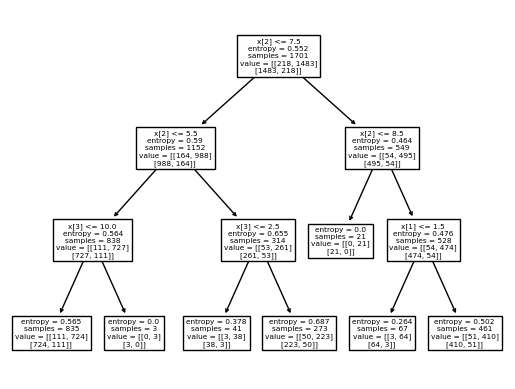

In [6952]:
tree.plot_tree(clf_entropy)

###ต้นที่ 1

In [6953]:
clf_entropy1 = DecisionTreeClassifier(criterion="entropy", random_state=100, max_depth=2)
clf_entropy1.fit(X_train, y_train_encoded)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=100)

In [6954]:
y_pred_en1 = clf_entropy1.predict(X_test)
y_pred_en1

array([[1, 0],
       [1, 0],
       [1, 0],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]], dtype=uint8)

[Text(0.5, 0.8333333333333334, 'x[2] <= 7.5\nentropy = 0.552\nsamples = 1701\nvalue = [[218, 1483]\n[1483, 218]]'),
 Text(0.25, 0.5, 'x[2] <= 5.5\nentropy = 0.59\nsamples = 1152\nvalue = [[164, 988]\n[988, 164]]'),
 Text(0.125, 0.16666666666666666, 'entropy = 0.564\nsamples = 838\nvalue = [[111, 727]\n[727, 111]]'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.655\nsamples = 314\nvalue = [[53, 261]\n[261, 53]]'),
 Text(0.75, 0.5, 'x[2] <= 8.5\nentropy = 0.464\nsamples = 549\nvalue = [[54, 495]\n[495, 54]]'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.0\nsamples = 21\nvalue = [[0, 21]\n[21, 0]]'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.476\nsamples = 528\nvalue = [[54, 474]\n[474, 54]]')]

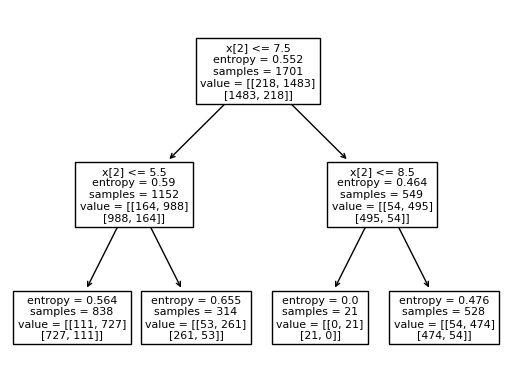

In [6955]:
tree.plot_tree(clf_entropy1)

In [6956]:
accuracy1 = accuracy_score(y_test_encoded, y_pred_en1)
print("Accuracy:", accuracy1)

Accuracy: 0.8602739726027397


###ต้นที่ 2

In [7008]:
clf_entropy2 = DecisionTreeClassifier(criterion="entropy", random_state=100, max_depth=2, min_samples_leaf=2)
clf_entropy2.fit(X_train, y_train_encoded)

DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_leaf=2,
                       random_state=100)

In [7009]:
y_pred_en2 = clf_entropy2.predict(X_test)
y_pred_en2

array([[1, 0],
       [1, 0],
       [1, 0],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]], dtype=uint8)

[Text(0.5, 0.8333333333333334, 'x[2] <= 7.5\nentropy = 0.552\nsamples = 1701\nvalue = [[218, 1483]\n[1483, 218]]'),
 Text(0.25, 0.5, 'x[2] <= 5.5\nentropy = 0.59\nsamples = 1152\nvalue = [[164, 988]\n[988, 164]]'),
 Text(0.125, 0.16666666666666666, 'entropy = 0.564\nsamples = 838\nvalue = [[111, 727]\n[727, 111]]'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.655\nsamples = 314\nvalue = [[53, 261]\n[261, 53]]'),
 Text(0.75, 0.5, 'x[2] <= 8.5\nentropy = 0.464\nsamples = 549\nvalue = [[54, 495]\n[495, 54]]'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.0\nsamples = 21\nvalue = [[0, 21]\n[21, 0]]'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.476\nsamples = 528\nvalue = [[54, 474]\n[474, 54]]')]

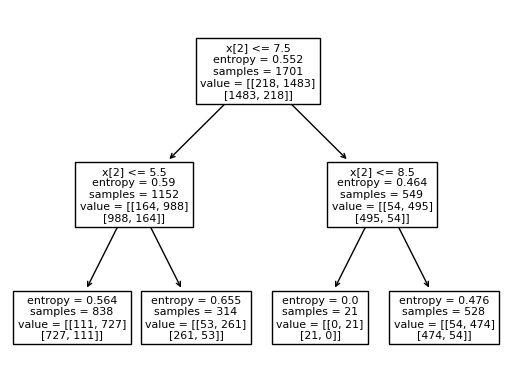

In [7010]:
tree.plot_tree(clf_entropy2)

In [7011]:
accuracy2 = accuracy_score(y_test_encoded, y_pred_en2)
print("Accuracy:", accuracy2)

Accuracy: 0.8602739726027397


###ต้นที่ 3

In [7012]:
clf_entropy3 = DecisionTreeClassifier(criterion="entropy", random_state=100, min_samples_split=6)
clf_entropy3.fit(X_train, y_train_encoded)

DecisionTreeClassifier(criterion='entropy', min_samples_split=6,
                       random_state=100)

In [7013]:
y_pred_en3 = clf_entropy3.predict(X_test)
y_pred_en3

array([[1, 0],
       [1, 0],
       [1, 0],
       ...,
       [1, 0],
       [0, 0],
       [1, 0]], dtype=uint8)

[Text(0.6050376129876308, 0.96875, 'x[2] <= 7.5\nentropy = 0.552\nsamples = 1701\nvalue = [[218, 1483]\n[1483, 218]]'),
 Text(0.3952560061845861, 0.90625, 'x[2] <= 5.5\nentropy = 0.59\nsamples = 1152\nvalue = [[164, 988]\n[988, 164]]'),
 Text(0.14279555185537585, 0.84375, 'x[3] <= 10.0\nentropy = 0.564\nsamples = 838\nvalue = [[111, 727]\n[727, 111]]'),
 Text(0.13898965271170313, 0.78125, 'x[0] <= 1.5\nentropy = 0.565\nsamples = 835\nvalue = [[111, 724]\n[724, 111]]'),
 Text(0.04471931493815414, 0.71875, 'x[1] <= 1.5\nentropy = 0.482\nsamples = 96\nvalue = [[10, 86]\n[86, 10]]'),
 Text(0.04091341579448145, 0.65625, 'entropy = 0.0\nsamples = 18\nvalue = [[0, 18]\n[18, 0]]'),
 Text(0.048525214081826834, 0.65625, 'x[2] <= 3.0\nentropy = 0.552\nsamples = 78\nvalue = [[10, 68]\n[68, 10]]'),
 Text(0.024738344433872503, 0.59375, 'x[1] <= 2.5\nentropy = 0.642\nsamples = 49\nvalue = [[8, 41]\n[41, 8]]'),
 Text(0.007611798287345386, 0.53125, 'x[3] <= 1.5\nentropy = 0.755\nsamples = 23\nvalue = [

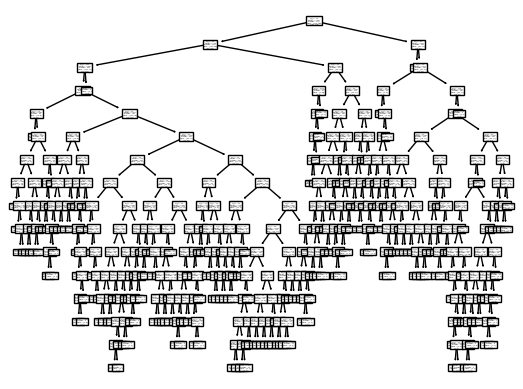

In [7014]:
tree.plot_tree(clf_entropy3)

In [7015]:
accuracy3 = accuracy_score(y_test_encoded, y_pred_en3)
print("Accuracy:", accuracy3)

Accuracy: 0.8191780821917808


###ต้นที่ 4

In [7016]:
clf_entropy4 = DecisionTreeClassifier(criterion="entropy", random_state=100, max_depth=2, min_weight_fraction_leaf=0.1, max_leaf_nodes=2)
clf_entropy4.fit(X_train, y_train_encoded)

DecisionTreeClassifier(criterion='entropy', max_depth=2, max_leaf_nodes=2,
                       min_weight_fraction_leaf=0.1, random_state=100)

In [7017]:
y_pred_en4 = clf_entropy4.predict(X_test)
y_pred_en4

array([[1, 0],
       [1, 0],
       [1, 0],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]], dtype=uint8)

[Text(0.5, 0.75, 'x[2] <= 7.5\nentropy = 0.552\nsamples = 1701\nvalue = [[218, 1483]\n[1483, 218]]'),
 Text(0.25, 0.25, 'entropy = 0.59\nsamples = 1152\nvalue = [[164, 988]\n[988, 164]]'),
 Text(0.75, 0.25, 'entropy = 0.464\nsamples = 549\nvalue = [[54, 495]\n[495, 54]]')]

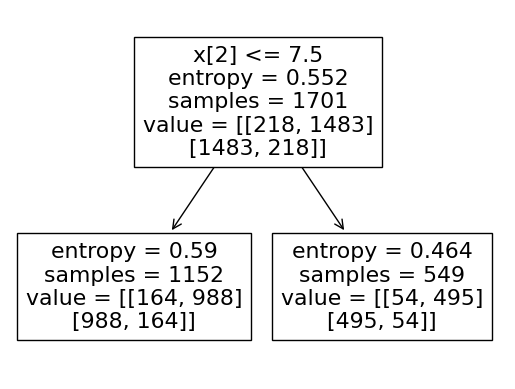

In [7018]:
tree.plot_tree(clf_entropy4)

In [6968]:
accuracy2 = accuracy_score(y_test_encoded, y_pred_en2)
print("Accuracy:", accuracy2)

Accuracy: 0.8602739726027397


##เตรียมข้อมูล Decision-Tree ของสาเหตุหลับใน

In [6969]:
data_truck_num1 = data_concat
data_truck_num1 = pd.DataFrame(data_concat)
data_truck_num1['Time'] = data_truck_num1['Time'].apply(lambda x: x.strip())
data_truck_num1['Time'] = data_truck_num1['Time'].replace({'16.01 - 20.00': '1',
'20.01 - 00.00':'2',
'00.01 - 04.00':'3',
'04.01 - 08.00': '4',
'08.01 - 12.00': '5',
'12.01 - 16.00':'6'})

In [6970]:
data_truck_num1

,Date,Time,Province,Loss,Party,Cause,Main cause of accidents
0,02/01/2560,5,11,3,8,4,0
1,04/01/2560,4,8,2,13,4,0
2,04/01/2560,2,49,2,3,3,0
3,04/01/2560,2,62,2,6,6,0
4,05/01/2560,4,2,2,3,3,1
...,...,...,...,...,...,...,...
685,29/12/2562,1,20,1,4,4,0
686,29/12/2562,1,24,2,6,4,0
687,30/12/2562,5,37,1,4,4,0
688,30/12/2562,5,2,2,4,4,0


In [6971]:
data_truck_num1 = data_concat
datamaincity = pd.DataFrame(data_concat)
datamaincity['Province'] = datamaincity['Province'].astype(int)
datamaincity['Province'] = datamaincity['Province'].replace({
    'Chiang Mai': 1,
    'Chiang Rai': 2,
    'Lampang': 3,
    'Lamphun': 4,
    'Mae Hong Son': 5,
    'Nan': 6,
    'Phayao': 7,
    'Phrae': 8,
    'Uttaradit': 9,
    'Kalasin': 10,
    'Khon Kaen': 11,
    'Chaiyaphum': 12,
    'Nakhon Phanom': 13,
    'Nakhon Ratchasima': 14,
    'Bueng Kan': 15,
    'Buriram': 16,
    'Maha Sarakham': 17,
    'Mukdahan': 18,
    'Yasothon': 19,
    'Roi Et': 20,
    'Loei': 21,
    'Sakon Nakhon': 22,
    'Surin': 23,
    'Sisaket': 24,
    'Nong Khai': 25,
    'Nong Bua Lamphu': 26,
    'Udon Thani': 27,
    'Ubon Ratchathani': 28,
    'Amnat Charoen': 29,
    'Bangkok': 30,
    'Kamphaeng Phet': 31,
    'Chai Nat': 32,
    'Nakhon Nayok': 33,
    'Nakhon Pathom': 34,
    'Nakhon Sawan': 35,
    'Nonthaburi': 36,
    'Pathum Thani': 37,
    'Phra Nakhon Si Ayutthaya': 38,
    'Phichit': 39,
    'Phitsanulok': 40,
    'Phetchabun': 41,
    'Lopburi': 42,
    'Samut Prakan': 43,
    'Samut Songkhram': 44,
    'Samut Sakhon': 45,
    'Sing Buri': 46,
    'Sukhothai': 47,
    'Suphan Buri': 48,
    'Saraburi': 49,
    'Ang Thong': 50,
    'Uthai Thani': 51,
    'Chanthaburi': 52,
    'Chachoengsao': 53,
    'Chonburi': 54,
    'Trat': 55,
    'Prachinburi': 56,
    'Rayong': 57,
    'Sa Kaeo': 58,
    'Kanchanaburi': 59,
    'Tak': 60,
    'Prachuap Khiri Khan': 61,
    'Phetchaburi': 62,
    'Ratchaburi': 63,
    'Krabi': 64,
    'Chumphon': 65,
    'Trang': 66,
    'Nakhon Si Thammarat': 67,
    'Narathiwat': 68,
    'Pattani': 69,
    'Phang Nga': 70,
    'Phatthalung': 71,
    'Phuket': 72,
    'Ranong': 73,
    'Satun': 74,
    'Songkhla': 75,
    'Surat Thani': 76,
    'Yala': 77
})

In [6972]:
#เปลี่ยนสาเหตุเป็นตัวเลขที่กำหนดไว้
data_truck_num1 = data_concat
datamain = pd.DataFrame(data_concat)
datamain['Main cause of accidents'] = datamain['Main cause of accidents'].astype(int)
datamain['Main cause of accidents'] = datamain['Main cause of accidents'].replace({ 'M1': 0,
    'M2': 0,
    'M3': 0,
    'M4': 1,
    'M5': 0,
    'M6': 0,
    'M7': 0,
    'M8': 0,
    'M9': 0,
    'M10': 0,
    'M11': 0,
    'M12': 0,
    'M13': 0,
    'M14': 0,
    'M15': 0,
    'M16': 0,
    'M17': 0,
    'M18': 0,
    'M19': 0,
    'M20': 0,
    'M21': 0,
    'M22': 0,
    'M23': 0,
    'M24': 0,
    'M25': 0,
    'M26': 0,
    'M27': 0,
    'M28': 0,
    'M29': 0,
    'M30': 0,
    'M31': 0,
    'M32': 0,
    'M33': 0,
    'M34': 0
})

In [6973]:
# เปลี่ยนตัวแปรคู่กรณี (Party) เป็นตัวเลขที่กำหนดไว้
data_truck_num1 = data_concat
datapar = pd.DataFrame(data_concat)
datapar['Party'] = datapar['Party'].astype(int)
datapar['Party'] = datapar['Party'].replace({  'P1': 1,
    'P2': 2,
    'P3': 3,
    'P4': 4,
    'P5': 5,
    'P6': 6,
    'P7': 7,
    'P8': 8,
    'P9': 9,
    'P10': 10,
    'P11': 11,
    'P12': 12,
    'P13': 13,
    'P14': 14,
    'P15': 15})


In [6974]:
# เปลี่ยนตัวแปรรถต้นเหตุ (Cause) เป็นตัวเลขที่กำหนดไว้
data_truck_num1 = data_concat
datacau = pd.DataFrame(data_concat)
datacau['Cause'] = datacau['Cause'].astype(int)
datacau['Cause'] = datacau['Cause'].replace({ 'C1': 1,
    'C2': 2,
    'C3': 3,
    'C4': 4,
    'C5': 5,
    'C6': 6,
    'C7': 7,
    'C8': 8,
    'C9': 9,
    'C10': 10,
    'C11': 11,
    'C12': 12,
    'C13': 13,
    'C14': 14,
    'C15': 15
})

In [6975]:
data_truck_num1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2431 entries, 0 to 689
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Date                     2431 non-null   object
 1   Time                     2431 non-null   object
 2   Province                 2431 non-null   int64 
 3   Loss                     2431 non-null   int64 
 4   Party                    2431 non-null   int64 
 5   Cause                    2431 non-null   int64 
 6   Main cause of accidents  2431 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 216.5+ KB


In [6976]:
DATA_truck_df_for_sleep = data_truck_num1.copy()

In [6977]:
DATA_truck_df_for_sleep

,Date,Time,Province,Loss,Party,Cause,Main cause of accidents
0,02/01/2560,5,11,3,8,4,0
1,04/01/2560,4,8,2,13,4,0
2,04/01/2560,2,49,2,3,3,0
3,04/01/2560,2,62,2,6,6,0
4,05/01/2560,4,2,2,3,3,1
...,...,...,...,...,...,...,...
685,29/12/2562,1,20,1,4,4,0
686,29/12/2562,1,24,2,6,4,0
687,30/12/2562,5,37,1,4,4,0
688,30/12/2562,5,2,2,4,4,0


##Decision-Tree ของสาเหตุหลับใน

In [6978]:
data_tree2 = DATA_truck_df_New_tree[['Time','Loss','Party','Cause','Main cause of accidents']].replace(np.nan, '0')

In [6979]:
data_tree2

,Time,Loss,Party,Cause,Main cause of accidents
0,5,3,8,4,0
1,4,2,13,4,0
2,2,2,3,3,0
3,2,2,6,6,0
4,4,2,3,3,1
...,...,...,...,...,...
685,1,1,4,4,0
686,1,2,6,4,0
687,5,1,4,4,0
688,5,2,4,4,0


In [6980]:
data_tree2.reset_index(drop=True, inplace=True)

In [6981]:
X = data_tree2.values[:,:-1]
Y = data_tree2.values[:,-1]

In [6982]:
X

array([['5', 3, 8, 4],
       ['4', 2, 13, 4],
       ['2', 2, 3, 3],
       ...,
       ['5', 1, 4, 4],
       ['5', 2, 4, 4],
       ['1', 1, 4, 4]], dtype=object)

In [6983]:
Y

array([0, 0, 0, ..., 0, 0, 0], dtype=object)

In [6984]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  # or 'median', 'constant', etc.
X_imputed = imputer.fit_transform(X)

In [6985]:
x_train, x_test, y_train, y_test = train_test_split(X_imputed, Y, test_size= 0.3, random_state= 10)

In [6986]:
y_train_encoded = np.ravel(y_train)
y_test_encoded = np.ravel(y_test)

In [6987]:
y_train_encoded = np.ravel(y_train_encoded)
y_test_encoded = np.ravel(y_test_encoded)

In [6988]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [6989]:
onehot_encoder = OneHotEncoder(sparse=False)

y_train_encoded = onehot_encoder.fit_transform(y_train.reshape(-1, 1))
y_test_encoded = onehot_encoder.transform(y_test.reshape(-1, 1))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [6990]:
y_train_encoded = pd.get_dummies(y_train)
y_test_encoded = pd.get_dummies(y_test)

<ipython-input-6990-44c5376578b5>:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  y_train_encoded = pd.get_dummies(y_train)
<ipython-input-6990-44c5376578b5>:2: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  y_test_encoded = pd.get_dummies(y_test)


In [6991]:
print("Shape of y_train_encoded:", y_train_encoded.shape)
print("Shape of y_test_encoded:", y_test_encoded.shape)

Shape of y_train_encoded: (1701, 2)
Shape of y_test_encoded: (730, 2)


In [6992]:
print("Shape of x_train:", x_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of x_train: (1701, 4)
Shape of x_test: (730, 4)
Shape of y_train: (1701,)
Shape of y_test: (730,)


In [6993]:
y_train_encoded

,0,1
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
1696,1,0
1697,1,0
1698,0,1
1699,1,0


In [6994]:
y_test_encoded

,0,1
0,1,0
1,0,1
2,1,0
3,1,0
4,0,1
...,...,...
725,1,0
726,1,0
727,1,0
728,1,0


In [6995]:
X_train, X_test, y_train, y_test = train_test_split(X_imputed, Y, test_size=0.3, random_state=10, stratify=Y)

In [6996]:
clf_entropy = DecisionTreeClassifier(criterion="entropy", random_state=100, max_depth=3)
clf_entropy.fit(X_train, y_train_encoded)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=100)

In [6997]:
y_pred_en = clf_entropy.predict(X_test)
y_pred_en

array([[1, 0],
       [1, 0],
       [1, 0],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]], dtype=uint8)

In [6998]:
print("Shape of y_train_encoded:", y_train_encoded.shape)
print("Shape of y_pred_en:", y_pred_en.shape)

Shape of y_train_encoded: (1701, 2)
Shape of y_pred_en: (730, 2)


##ต้นที่ 1

In [6999]:
clf_gini = DecisionTreeClassifier(criterion="gini", random_state=100, max_depth=3)
clf_gini.fit(X_train, y_train_encoded)

DecisionTreeClassifier(max_depth=3, random_state=100)

In [7000]:
y_pred_gini = clf_gini.predict(X_test)
y_pred_gini

array([[1, 0],
       [1, 0],
       [1, 0],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]], dtype=uint8)

In [7001]:
print("Shape of y_train_encoded:", y_train_encoded.shape)
print("Shape of y_pred_en:", y_pred_gini.shape)

Shape of y_train_encoded: (1701, 2)
Shape of y_pred_en: (730, 2)


[Text(0.5, 0.875, 'x[2] <= 7.5\ngini = 0.223\nsamples = 1701\nvalue = [[218, 1483]\n[1483, 218]]'),
 Text(0.25, 0.625, 'x[2] <= 5.5\ngini = 0.244\nsamples = 1152\nvalue = [[164, 988]\n[988, 164]]'),
 Text(0.125, 0.375, 'x[0] <= 1.5\ngini = 0.23\nsamples = 838\nvalue = [[111, 727]\n[727, 111]]'),
 Text(0.0625, 0.125, 'gini = 0.187\nsamples = 96\nvalue = [[10, 86]\n[86, 10]]'),
 Text(0.1875, 0.125, 'gini = 0.235\nsamples = 742\nvalue = [[101, 641]\n[641, 101]]'),
 Text(0.375, 0.375, 'x[3] <= 2.5\ngini = 0.281\nsamples = 314\nvalue = [[53, 261]\n[261, 53]]'),
 Text(0.3125, 0.125, 'gini = 0.136\nsamples = 41\nvalue = [[3, 38]\n[38, 3]]'),
 Text(0.4375, 0.125, 'gini = 0.299\nsamples = 273\nvalue = [[50, 223]\n[223, 50]]'),
 Text(0.75, 0.625, 'x[1] <= 1.5\ngini = 0.177\nsamples = 549\nvalue = [[54, 495]\n[495, 54]]'),
 Text(0.625, 0.375, 'x[0] <= 2.5\ngini = 0.077\nsamples = 75\nvalue = [[3, 72]\n[72, 3]]'),
 Text(0.5625, 0.125, 'gini = 0.0\nsamples = 21\nvalue = [[0, 21]\n[21, 0]]'),
 Text(

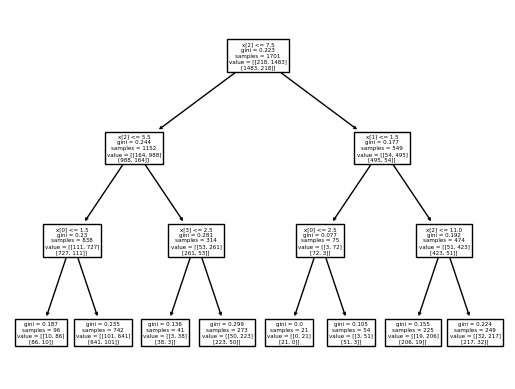

In [7002]:
tree.plot_tree(clf_gini)

In [7003]:
from sklearn.metrics import accuracy_score

accuracy_sleep1 = accuracy_score(y_test_encoded, y_pred_gini)
print("Accuracy:", accuracy_sleep1)

Accuracy: 0.8602739726027397


##ต้นที่ 2

In [7004]:
clf_gini2 = DecisionTreeClassifier(criterion="gini", random_state=100, max_depth=2, min_samples_leaf=2)
clf_gini2.fit(X_train, y_train_encoded)

DecisionTreeClassifier(max_depth=2, min_samples_leaf=2, random_state=100)

In [7005]:
y_pred_gini2 = clf_gini2.predict(X_test)
y_pred_gini2

array([[1, 0],
       [1, 0],
       [1, 0],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]], dtype=uint8)

[Text(0.5, 0.8333333333333334, 'x[2] <= 7.5\ngini = 0.223\nsamples = 1701\nvalue = [[218, 1483]\n[1483, 218]]'),
 Text(0.25, 0.5, 'x[2] <= 5.5\ngini = 0.244\nsamples = 1152\nvalue = [[164, 988]\n[988, 164]]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.23\nsamples = 838\nvalue = [[111, 727]\n[727, 111]]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.281\nsamples = 314\nvalue = [[53, 261]\n[261, 53]]'),
 Text(0.75, 0.5, 'x[1] <= 1.5\ngini = 0.177\nsamples = 549\nvalue = [[54, 495]\n[495, 54]]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.077\nsamples = 75\nvalue = [[3, 72]\n[72, 3]]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.192\nsamples = 474\nvalue = [[51, 423]\n[423, 51]]')]

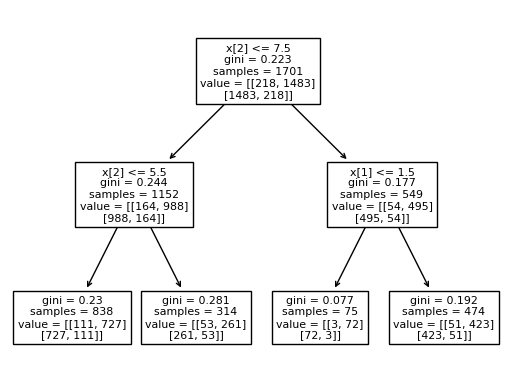

In [7006]:
tree.plot_tree(clf_gini2)

In [7007]:
accuracy_sleep2 = accuracy_score(y_test_encoded, y_pred_gini2)
print("Accuracy:", accuracy_sleep2)

Accuracy: 0.8602739726027397
